In [5]:
# standard library
import sys

# pydata stack
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import svm

#from IPython.display import set_matplotlib_formats
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')

%matplotlib inline

In [4]:
print(f'Python version: {sys.version}')
print(f'pandas version: {pd.__version__}')
print(f'seaborn version: {sns.__version__}')
print(f'scikit-learn: {sklearn.__version__}')

Python version: 3.11.9 (tags/v3.11.9:de54cf5, Apr  2 2024, 10:12:12) [MSC v.1938 64 bit (AMD64)]
pandas version: 2.2.3
seaborn version: 0.13.2
scikit-learn: 1.6.1


---

## Load Dataset

In [7]:
iris = pd.read_csv('data/iris.csv')

---

## Explore with Pandas

In [8]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [9]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [11]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   sepal_length  150 non-null    float64 
 1   sepal_width   150 non-null    float64 
 2   petal_length  150 non-null    float64 
 3   petal_width   150 non-null    float64 
 4   species       150 non-null    category
dtypes: category(1), float64(4)
memory usage: 5.1 KB


In [10]:
iris['species'] = iris['species'].astype('category')

In [7]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null category
dtypes: category(1), float64(4)
memory usage: 5.0 KB


In [8]:
values = ['count', 'min', 'max', 'mean', 'std']
iris.groupby(by='species').agg(values)

sepal_length                            sepal_width            \
                  count  min  max   mean       std       count  min  max   
species                                                                    
setosa               50  4.3  5.8  5.006  0.352490          50  2.3  4.4   
versicolor           50  4.9  7.0  5.936  0.516171          50  2.0  3.4   
virginica            50  4.9  7.9  6.588  0.635880          50  2.2  3.8   

                            petal_length                             \
             mean       std        count  min  max   mean       std   
species                                                               
setosa      3.418  0.381024           50  1.0  1.9  1.464  0.173511   
versicolor  2.770  0.313798           50  3.0  5.1  4.260  0.469911   
virginica   2.974  0.322497           50  4.5  6.9  5.552  0.551895   

           petal_width                             
                 count  min  max   mean       std  
species                                            
setosa              50  0.1  0.6  0.244  0.107210  
versicolor          50  1.0  1.8  1.326  0.197753  
virginica           50  1.4  2.5  2.026  0.274650

---

## Visualization

<Axes: ylabel='Frequency'>

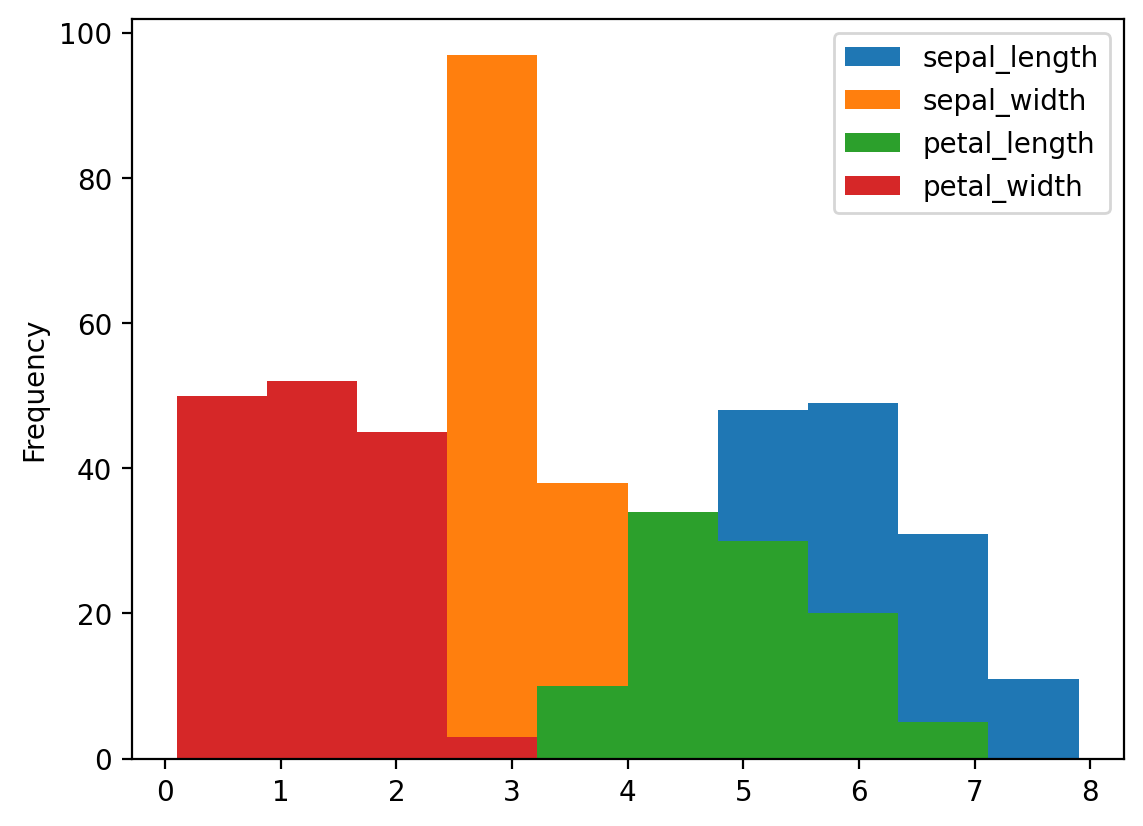

In [12]:
iris.plot.hist()

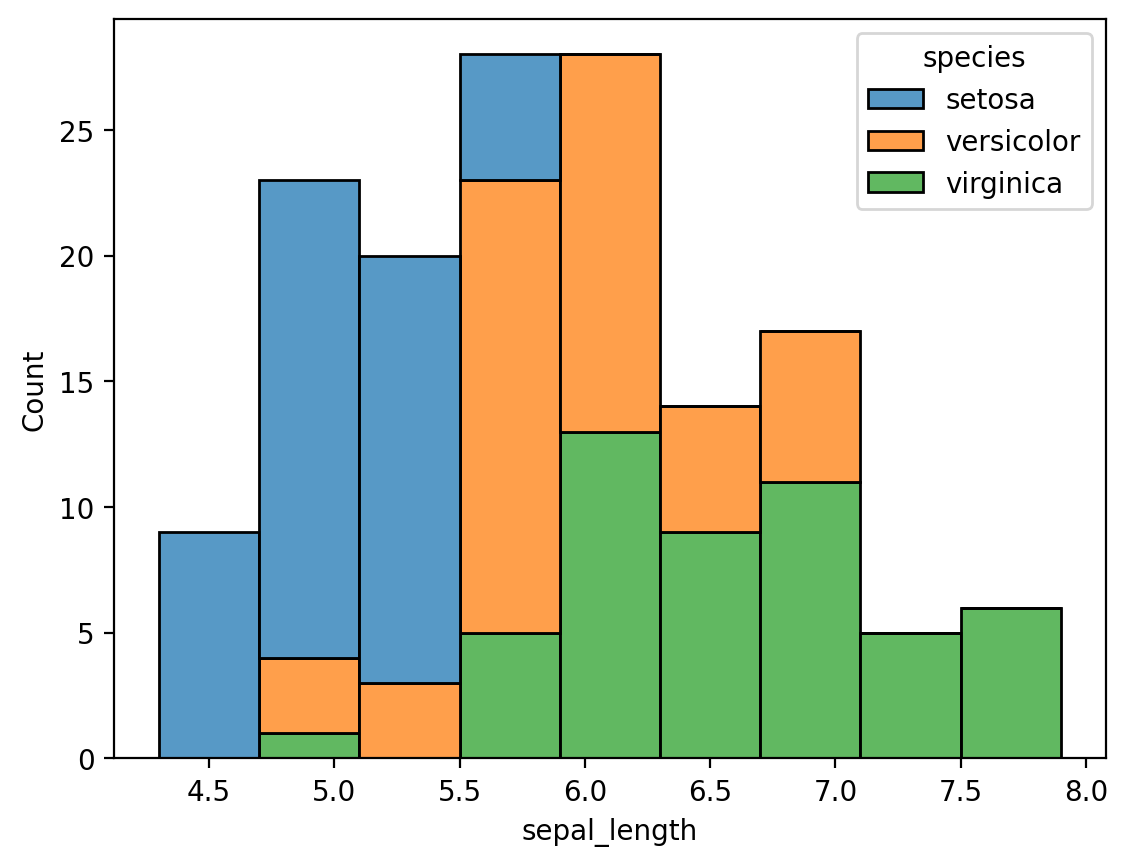

In [16]:

sns.histplot(data=iris, x="sepal_length", hue="species", multiple="stack")
plt.show()


<Axes: ylabel='Frequency'>

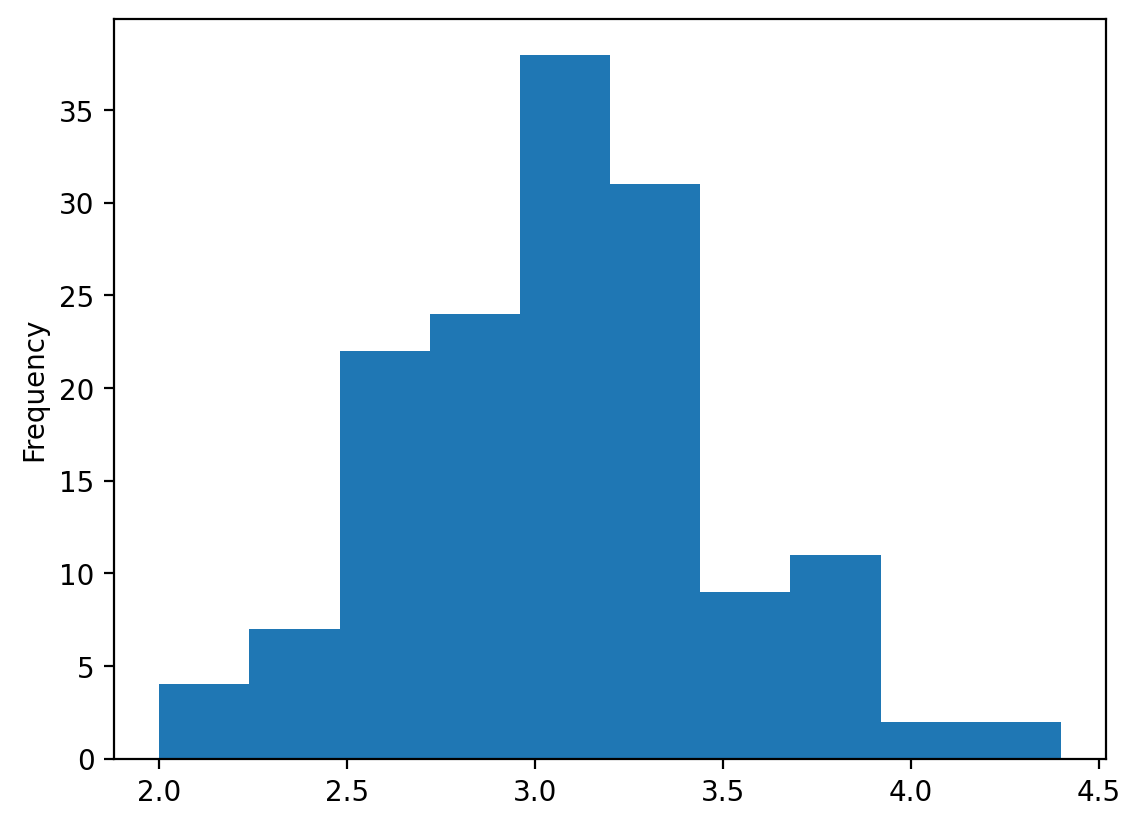

In [17]:
iris['sepal_width'].plot.hist()

<Axes: ylabel='Frequency'>

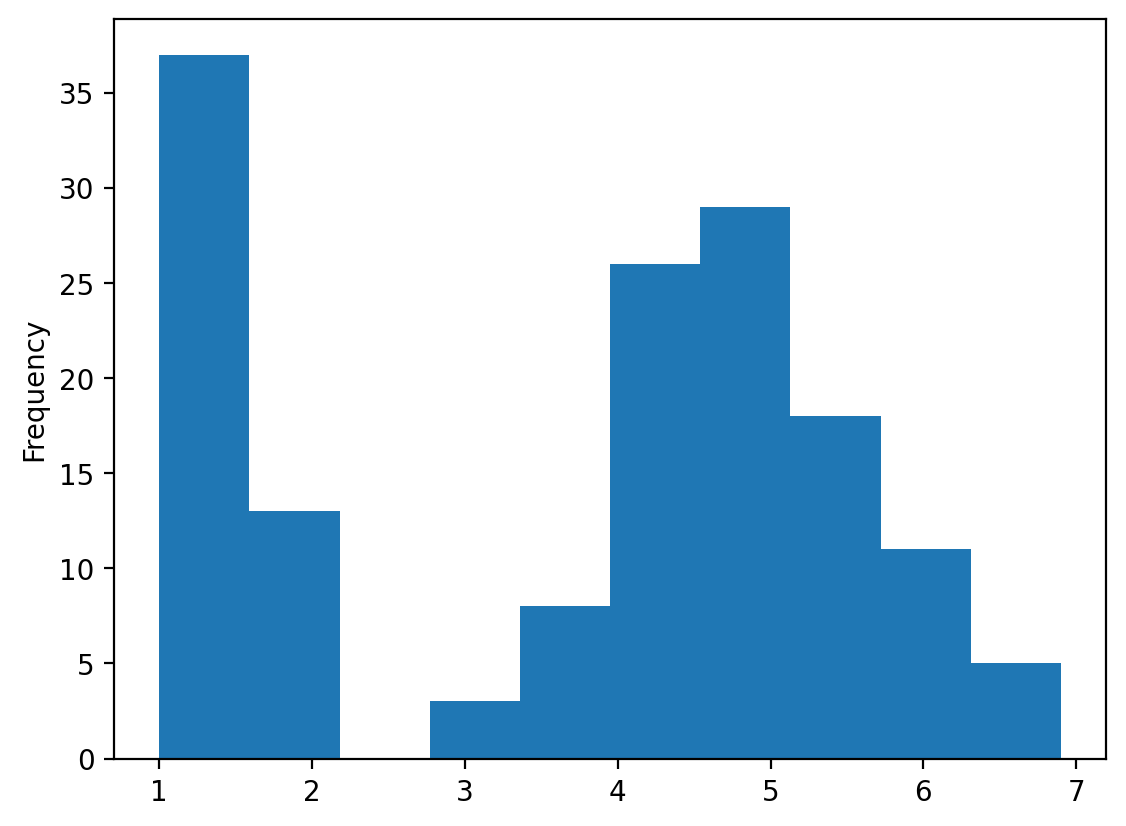

In [18]:
iris['petal_length'].plot.hist()

<Axes: ylabel='Frequency'>

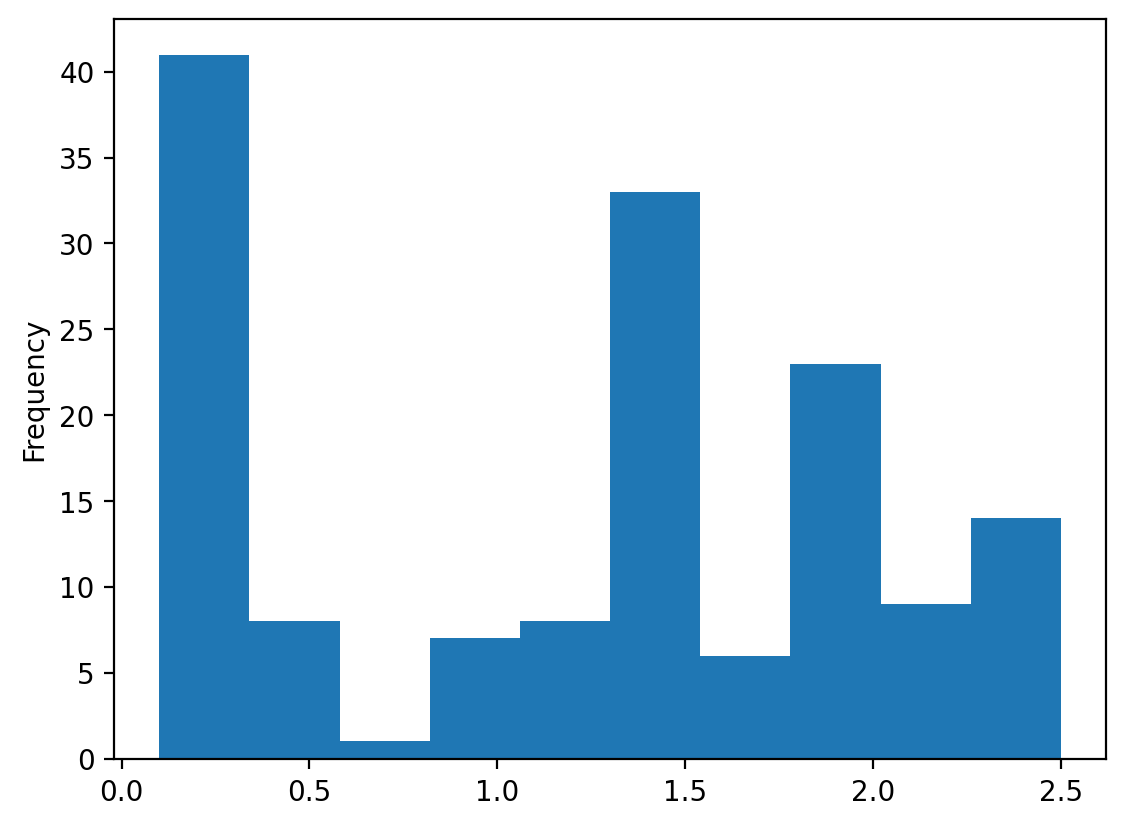

In [19]:
iris['petal_width'].plot.hist()

---

array([[<Axes: title={'center': 'petal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'petal_width'}, xlabel='[species]'>],
       [<Axes: title={'center': 'sepal_length'}, xlabel='[species]'>,
        <Axes: title={'center': 'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

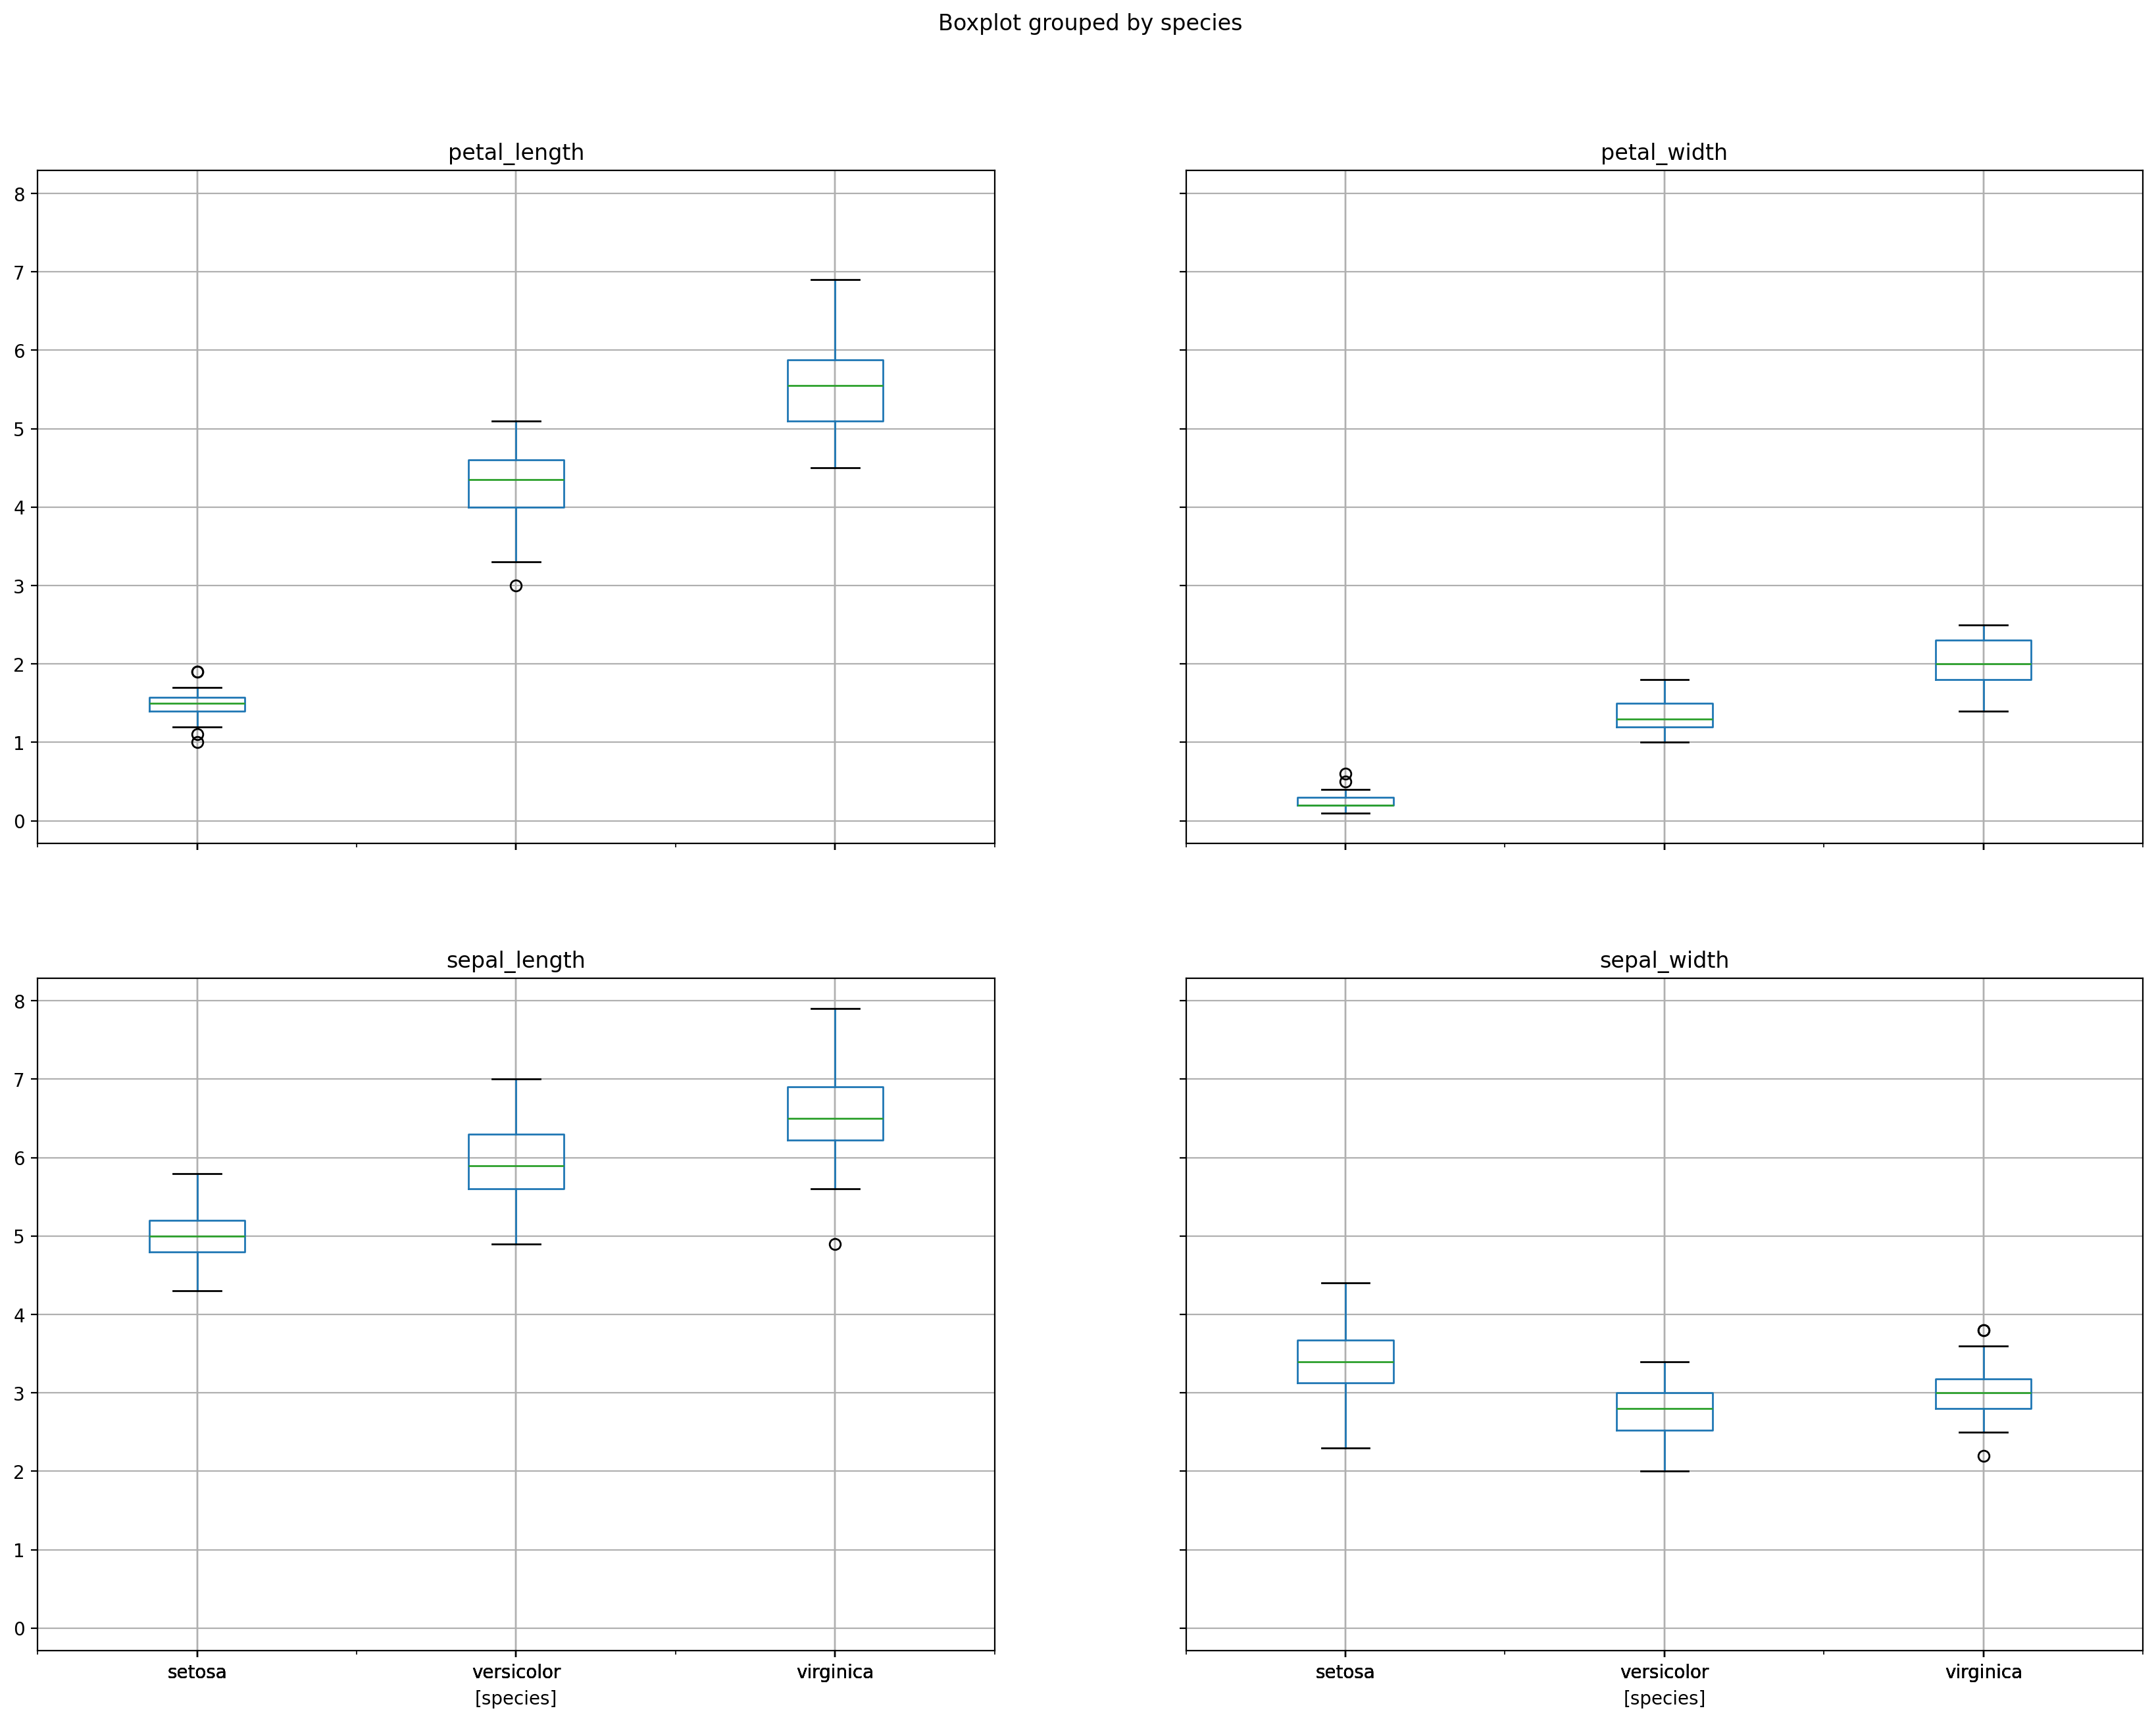

In [20]:
iris.boxplot(by='species', figsize=(20, 15))

---

## Multidimensional Plots

In [21]:
from pandas.plotting import scatter_matrix

array([[<Axes: xlabel='sepal_length', ylabel='sepal_length'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_length'>,
        <Axes: xlabel='petal_length', ylabel='sepal_length'>,
        <Axes: xlabel='petal_width', ylabel='sepal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='sepal_width'>,
        <Axes: xlabel='sepal_width', ylabel='sepal_width'>,
        <Axes: xlabel='petal_length', ylabel='sepal_width'>,
        <Axes: xlabel='petal_width', ylabel='sepal_width'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_length'>,
        <Axes: xlabel='sepal_width', ylabel='petal_length'>,
        <Axes: xlabel='petal_length', ylabel='petal_length'>,
        <Axes: xlabel='petal_width', ylabel='petal_length'>],
       [<Axes: xlabel='sepal_length', ylabel='petal_width'>,
        <Axes: xlabel='sepal_width', ylabel='petal_width'>,
        <Axes: xlabel='petal_length', ylabel='petal_width'>,
        <Axes: xlabel='petal_width', ylabel='petal_width'>]], dtype=object)

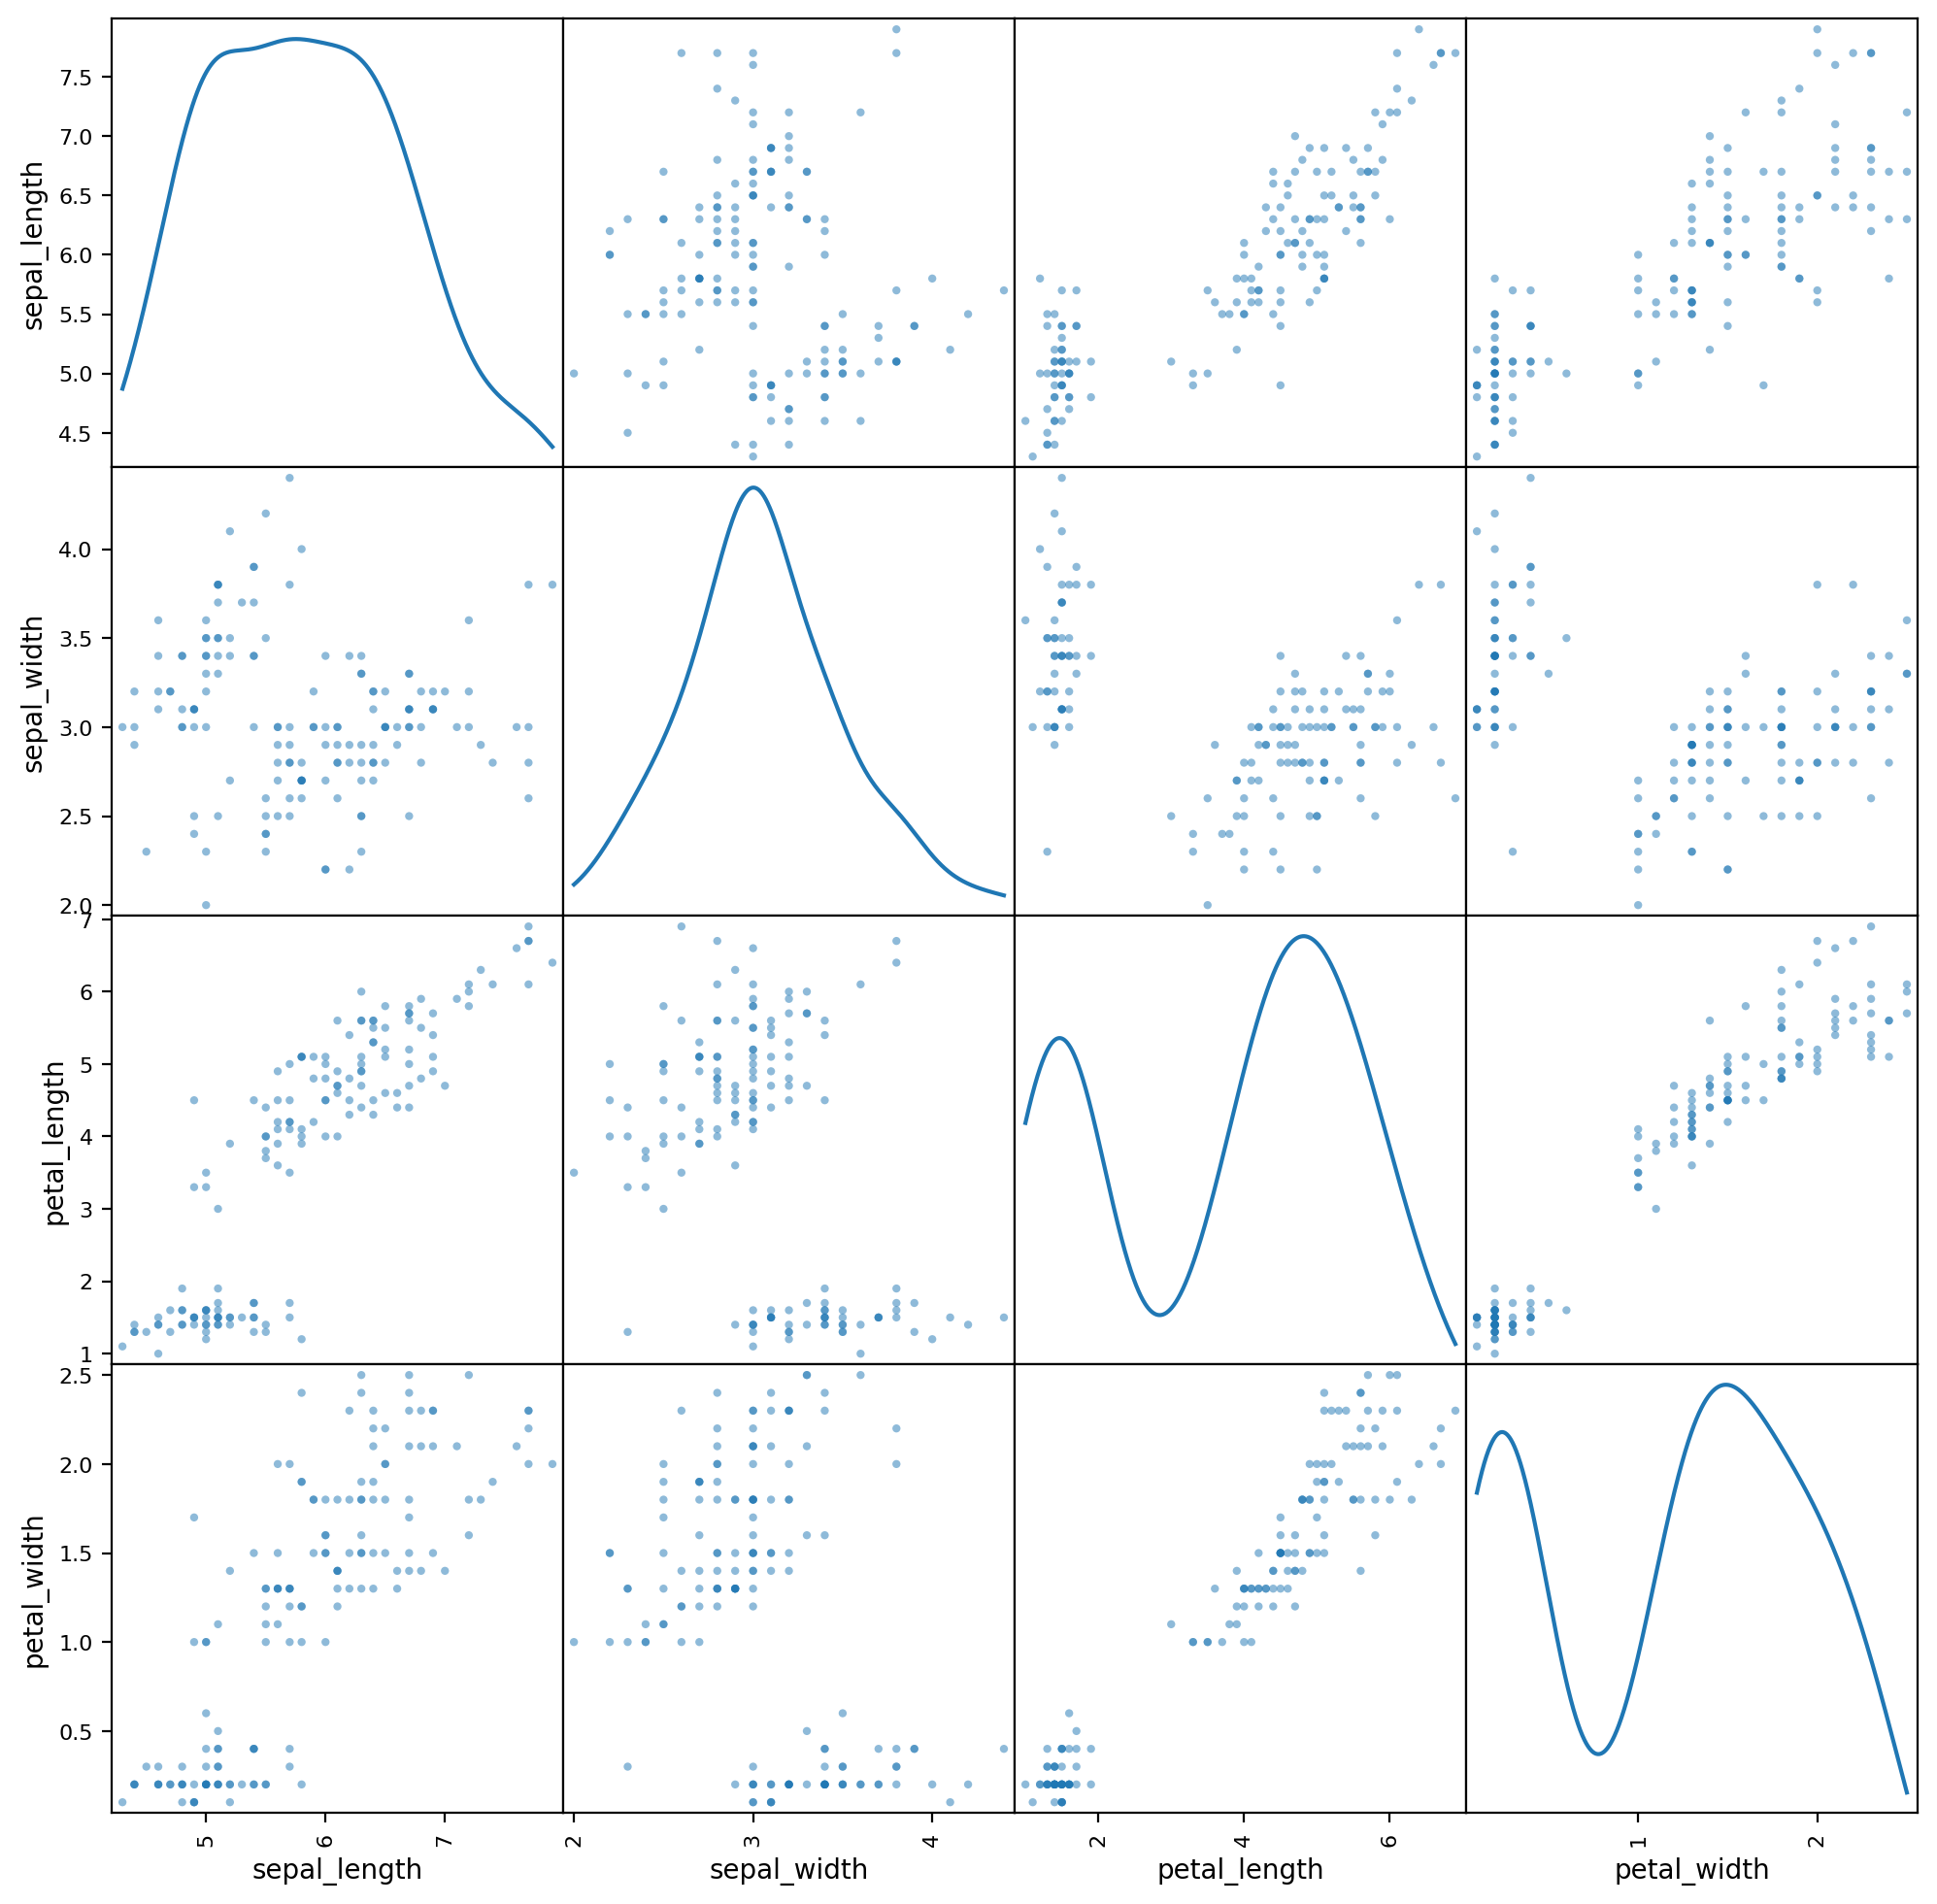

In [22]:
scatter_matrix(iris, figsize=(12, 12), diagonal='kde')

In [23]:
from pandas.plotting import andrews_curves

<Axes: >

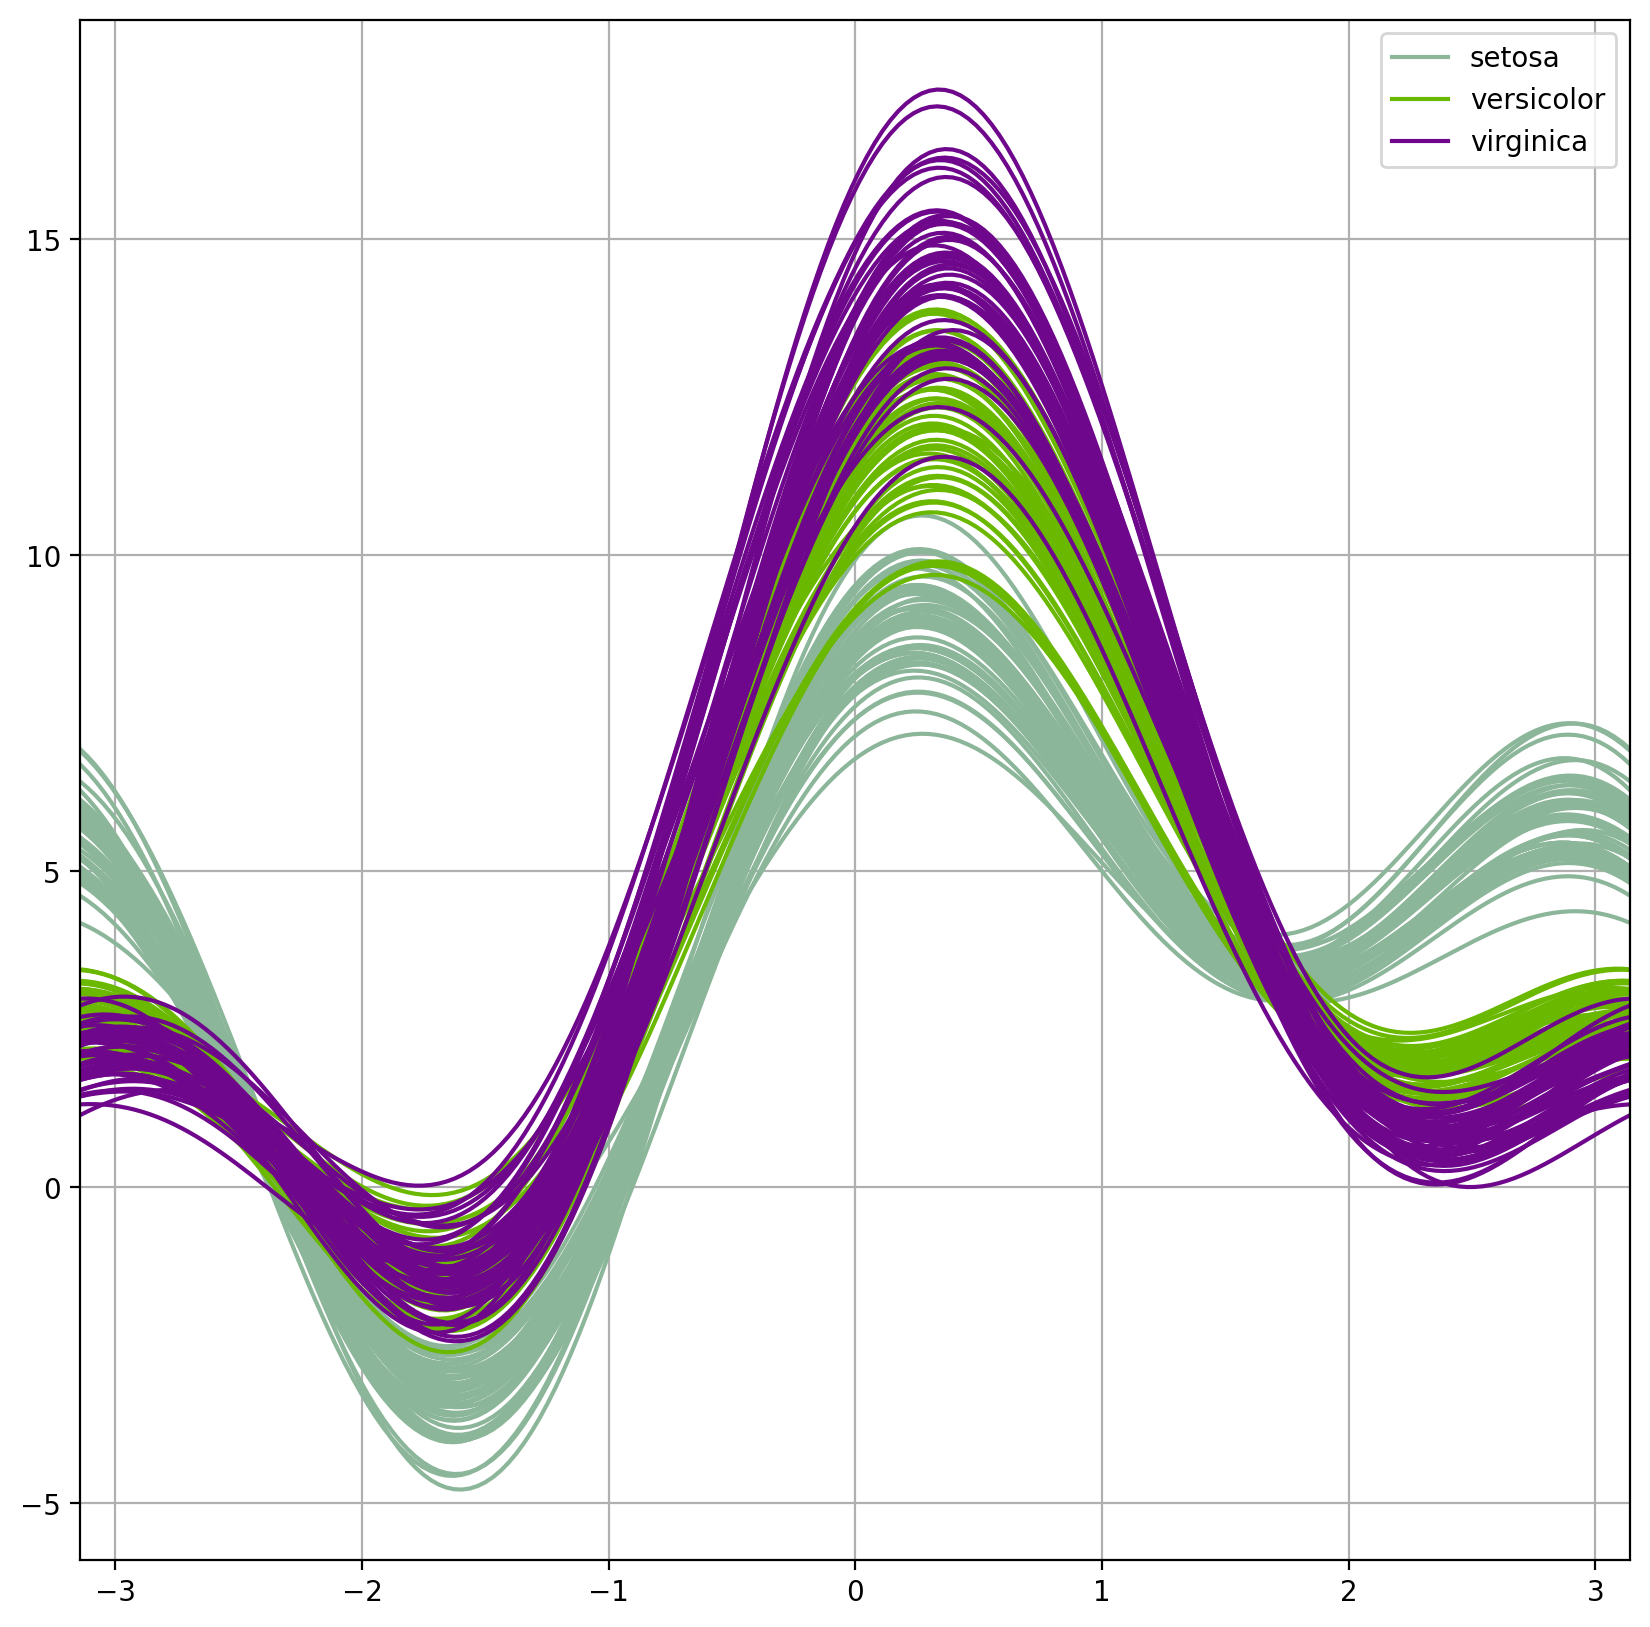

In [24]:
plt.figure(figsize=(10, 10))
andrews_curves(iris, 'species')

In [25]:
from pandas.plotting import parallel_coordinates

<Axes: >

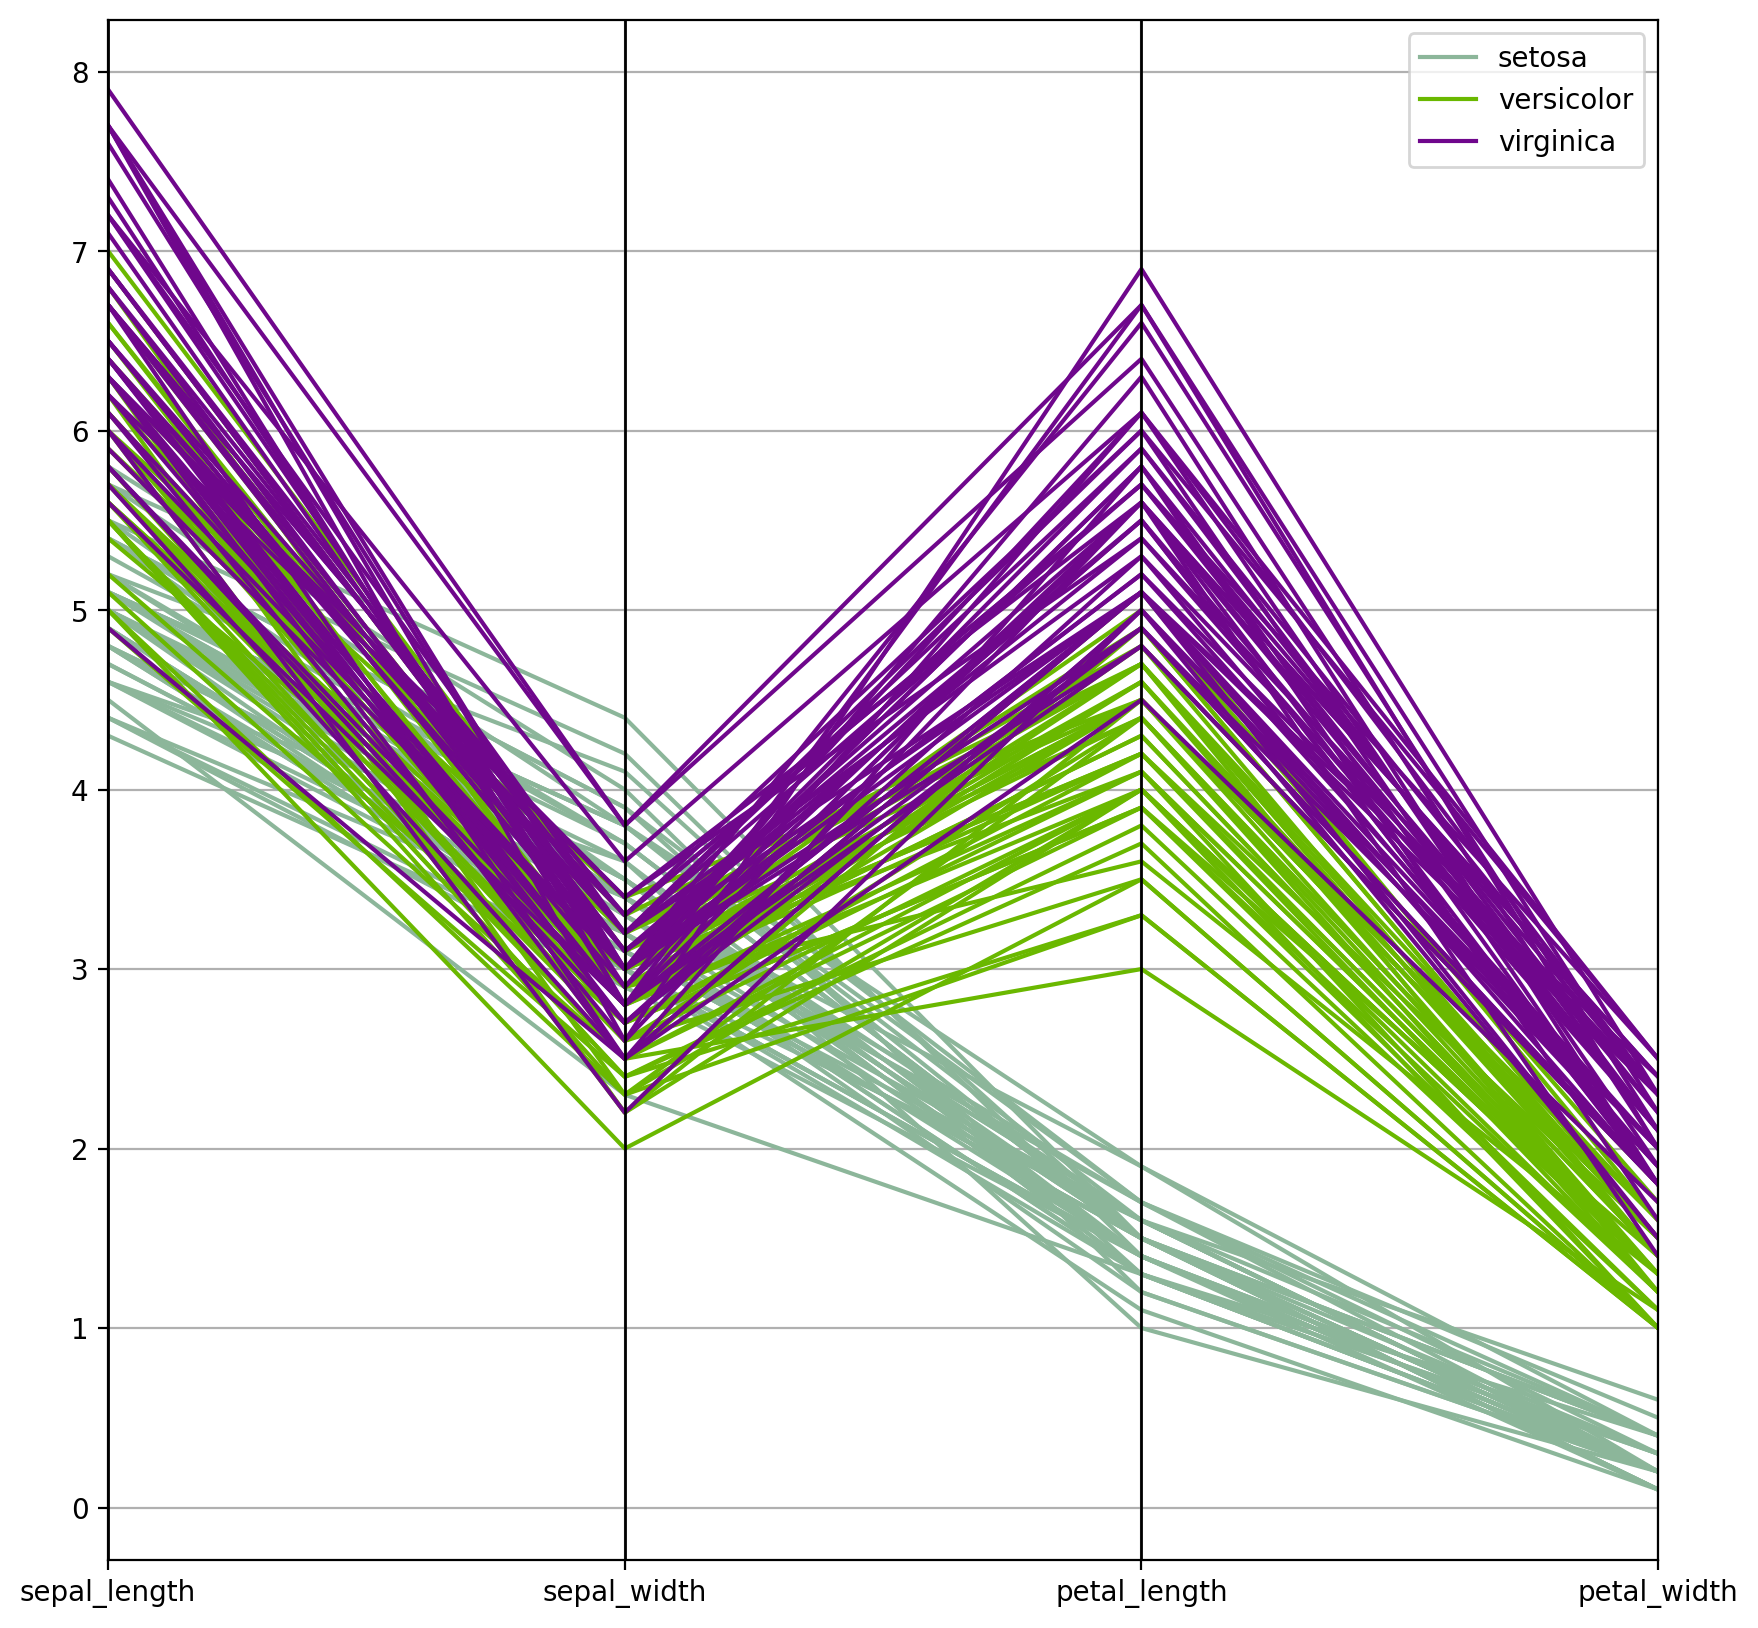

In [26]:
plt.figure(figsize=(10, 10))
parallel_coordinates(iris, 'species')

In [27]:
from pandas.plotting import radviz

<Axes: >

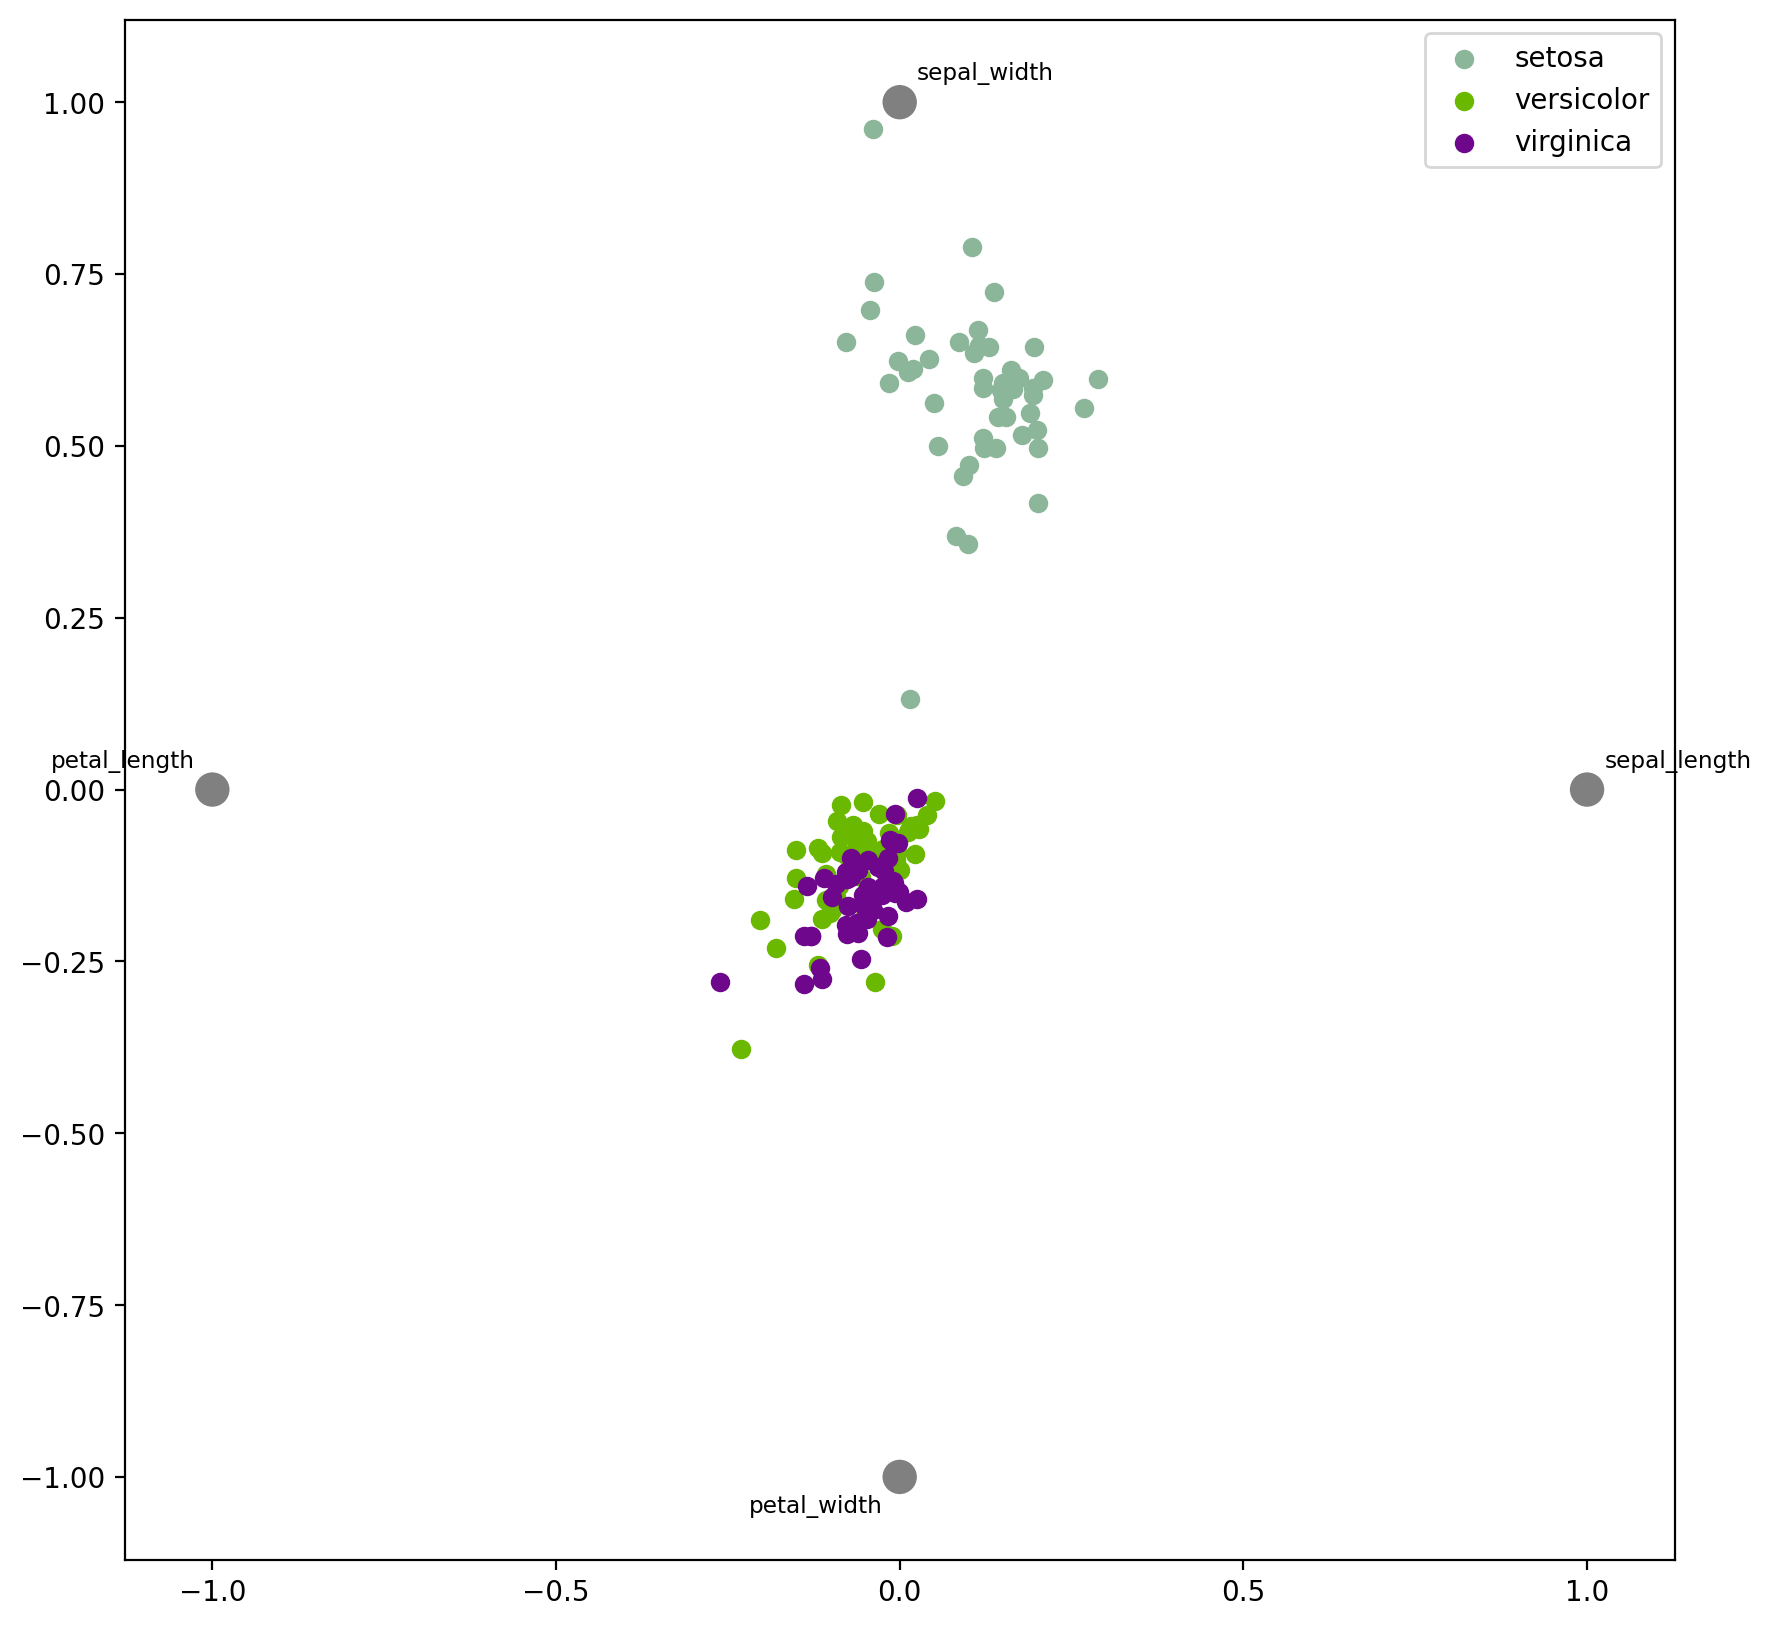

In [28]:
plt.figure(figsize=(10, 10))
radviz(iris, 'species')

---

## Seaborn Visualization

In [29]:
sns.set(color_codes=True)

### Distributions

C:\Users\AbdessalemDjoudi\AppData\Local\Temp\ipykernel_23648\1451853182.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iris['sepal_width'])


<Axes: xlabel='sepal_width', ylabel='Density'>

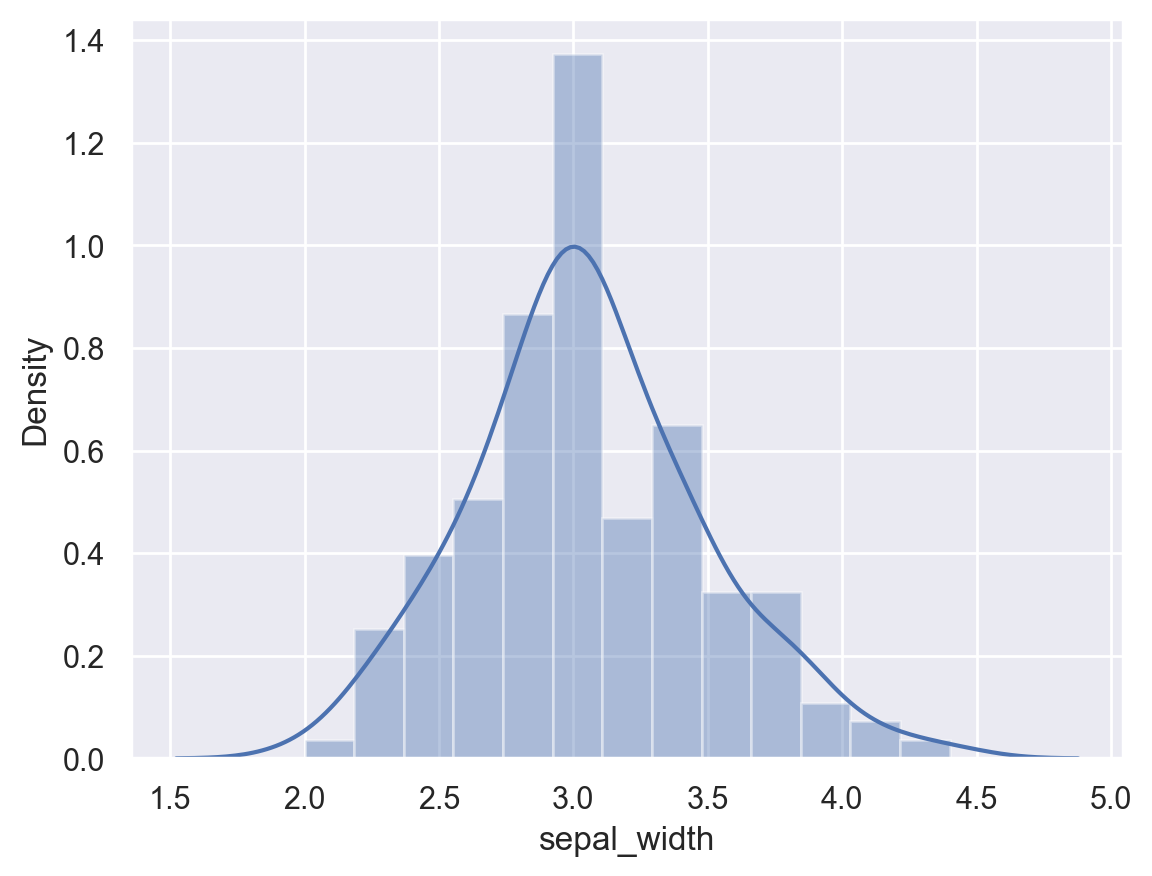

In [31]:
sns.distplot(iris['sepal_width'])

C:\Users\AbdessalemDjoudi\AppData\Local\Temp\ipykernel_23648\2033058660.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iris['sepal_width'],


<Axes: xlabel='sepal_width', ylabel='Density'>

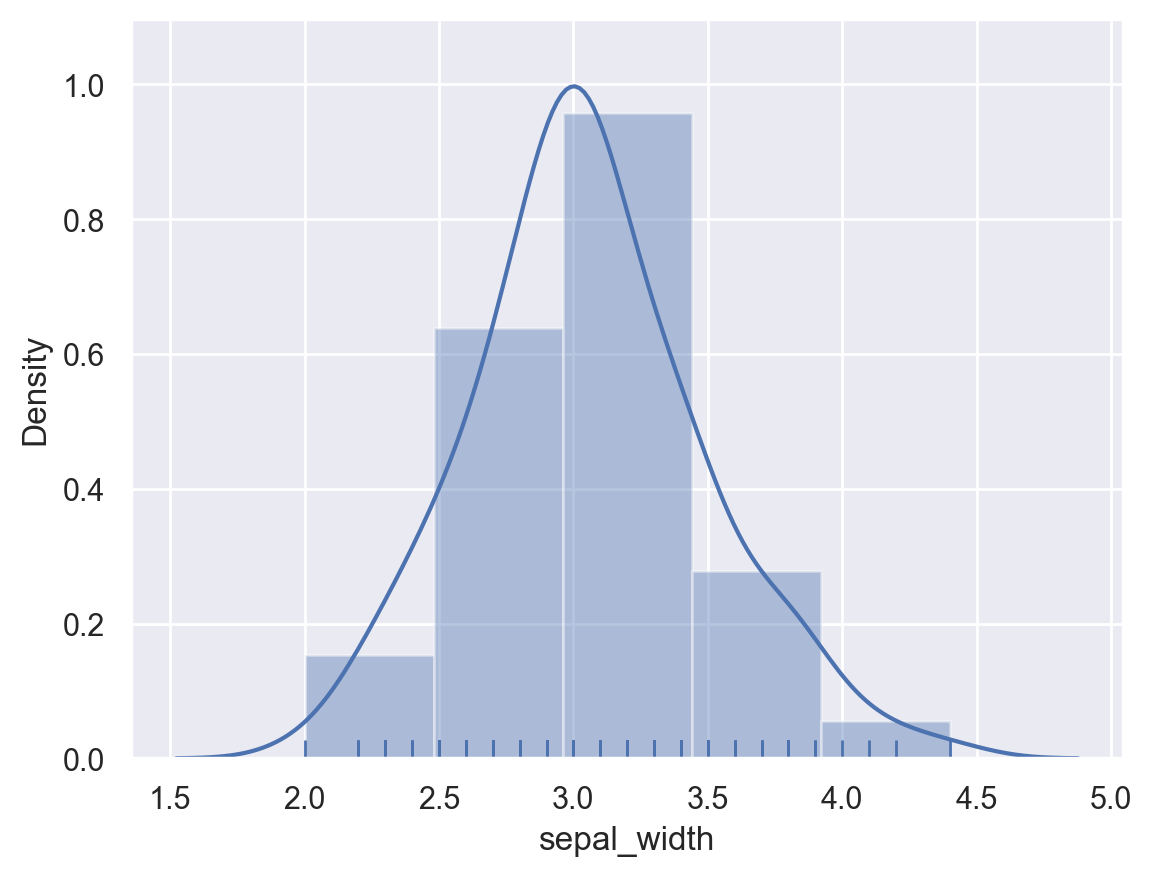

In [32]:
sns.distplot(iris['sepal_width'],
             hist=True,
             kde=True,
             rug=True,
             bins=5)

C:\Users\AbdessalemDjoudi\AppData\Local\Temp\ipykernel_23648\2096358553.py:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.13`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(iris['sepal_width'],
C:\Users\AbdessalemDjoudi\AppData\Local\Temp\ipykernel_23648\2096358553.py:2: UserWarning: 

Support for alternate kernels has been removed; using Gaussian kernel.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(iris['sepal_width'],
C:\Users\AbdessalemDjoudi\AppData\Local\Temp\ipykernel_23648\2096358553.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(iris['sepal_width'],


<Axes: xlabel='sepal_width', ylabel='Density'>

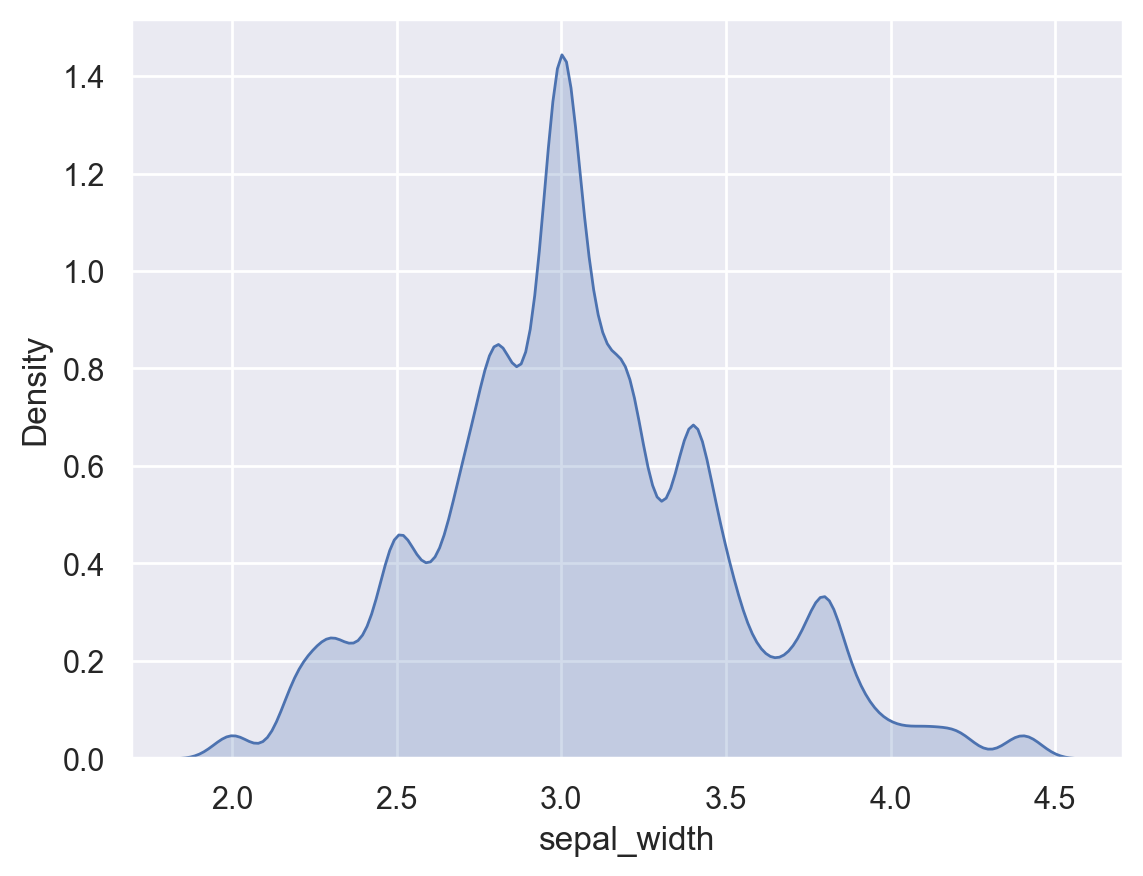

In [33]:
# Kernel Density Estimate... can specify the kind f kernel
sns.kdeplot(iris['sepal_width'],
            shade=True,
            kernel='gau',
            bw=.13)

In [34]:
from scipy import stats

C:\Users\AbdessalemDjoudi\AppData\Local\Temp\ipykernel_23648\1893686924.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(iris['petal_width'],


<Axes: xlabel='petal_width', ylabel='Density'>

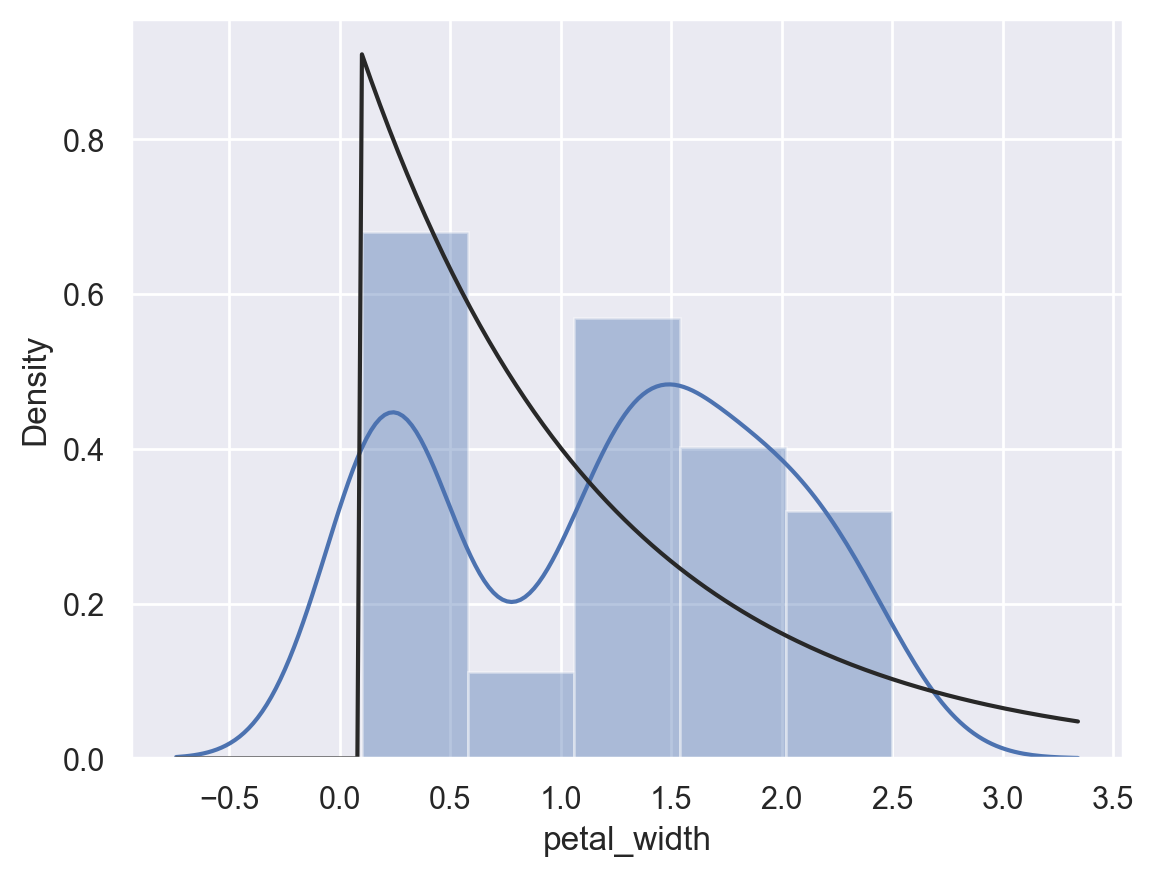

In [35]:
sns.distplot(iris['petal_width'],
             hist=True,
             kde=True,
             fit=stats.expon) ## pass in random variable object

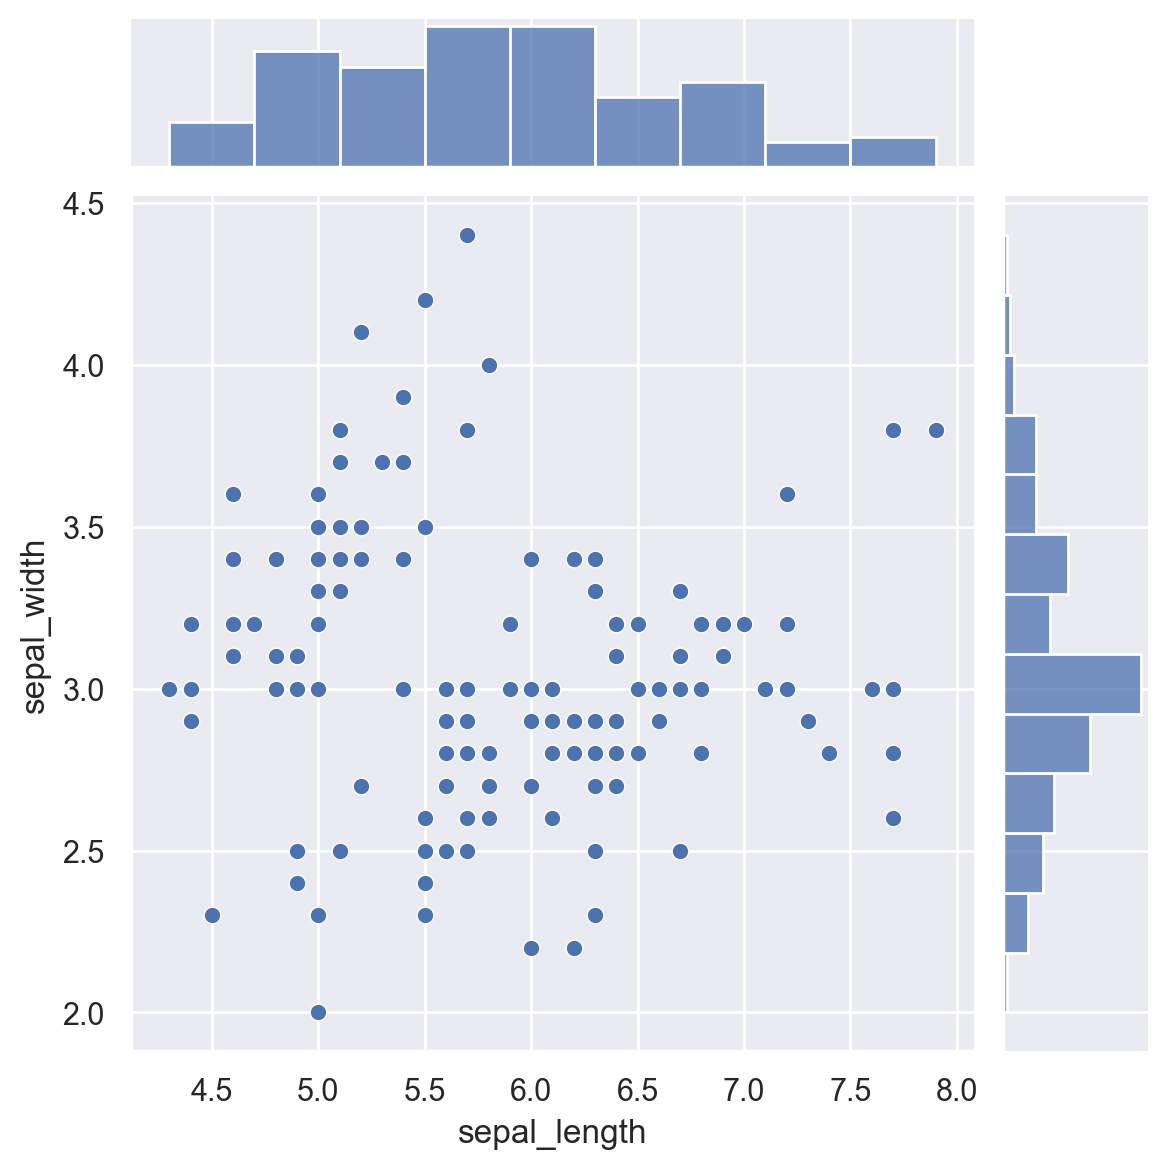

In [36]:
# Jointplot (bivariate distributions)
sns.jointplot(data=iris,
              x='sepal_length',
              y='sepal_width',
              kind='scatter')

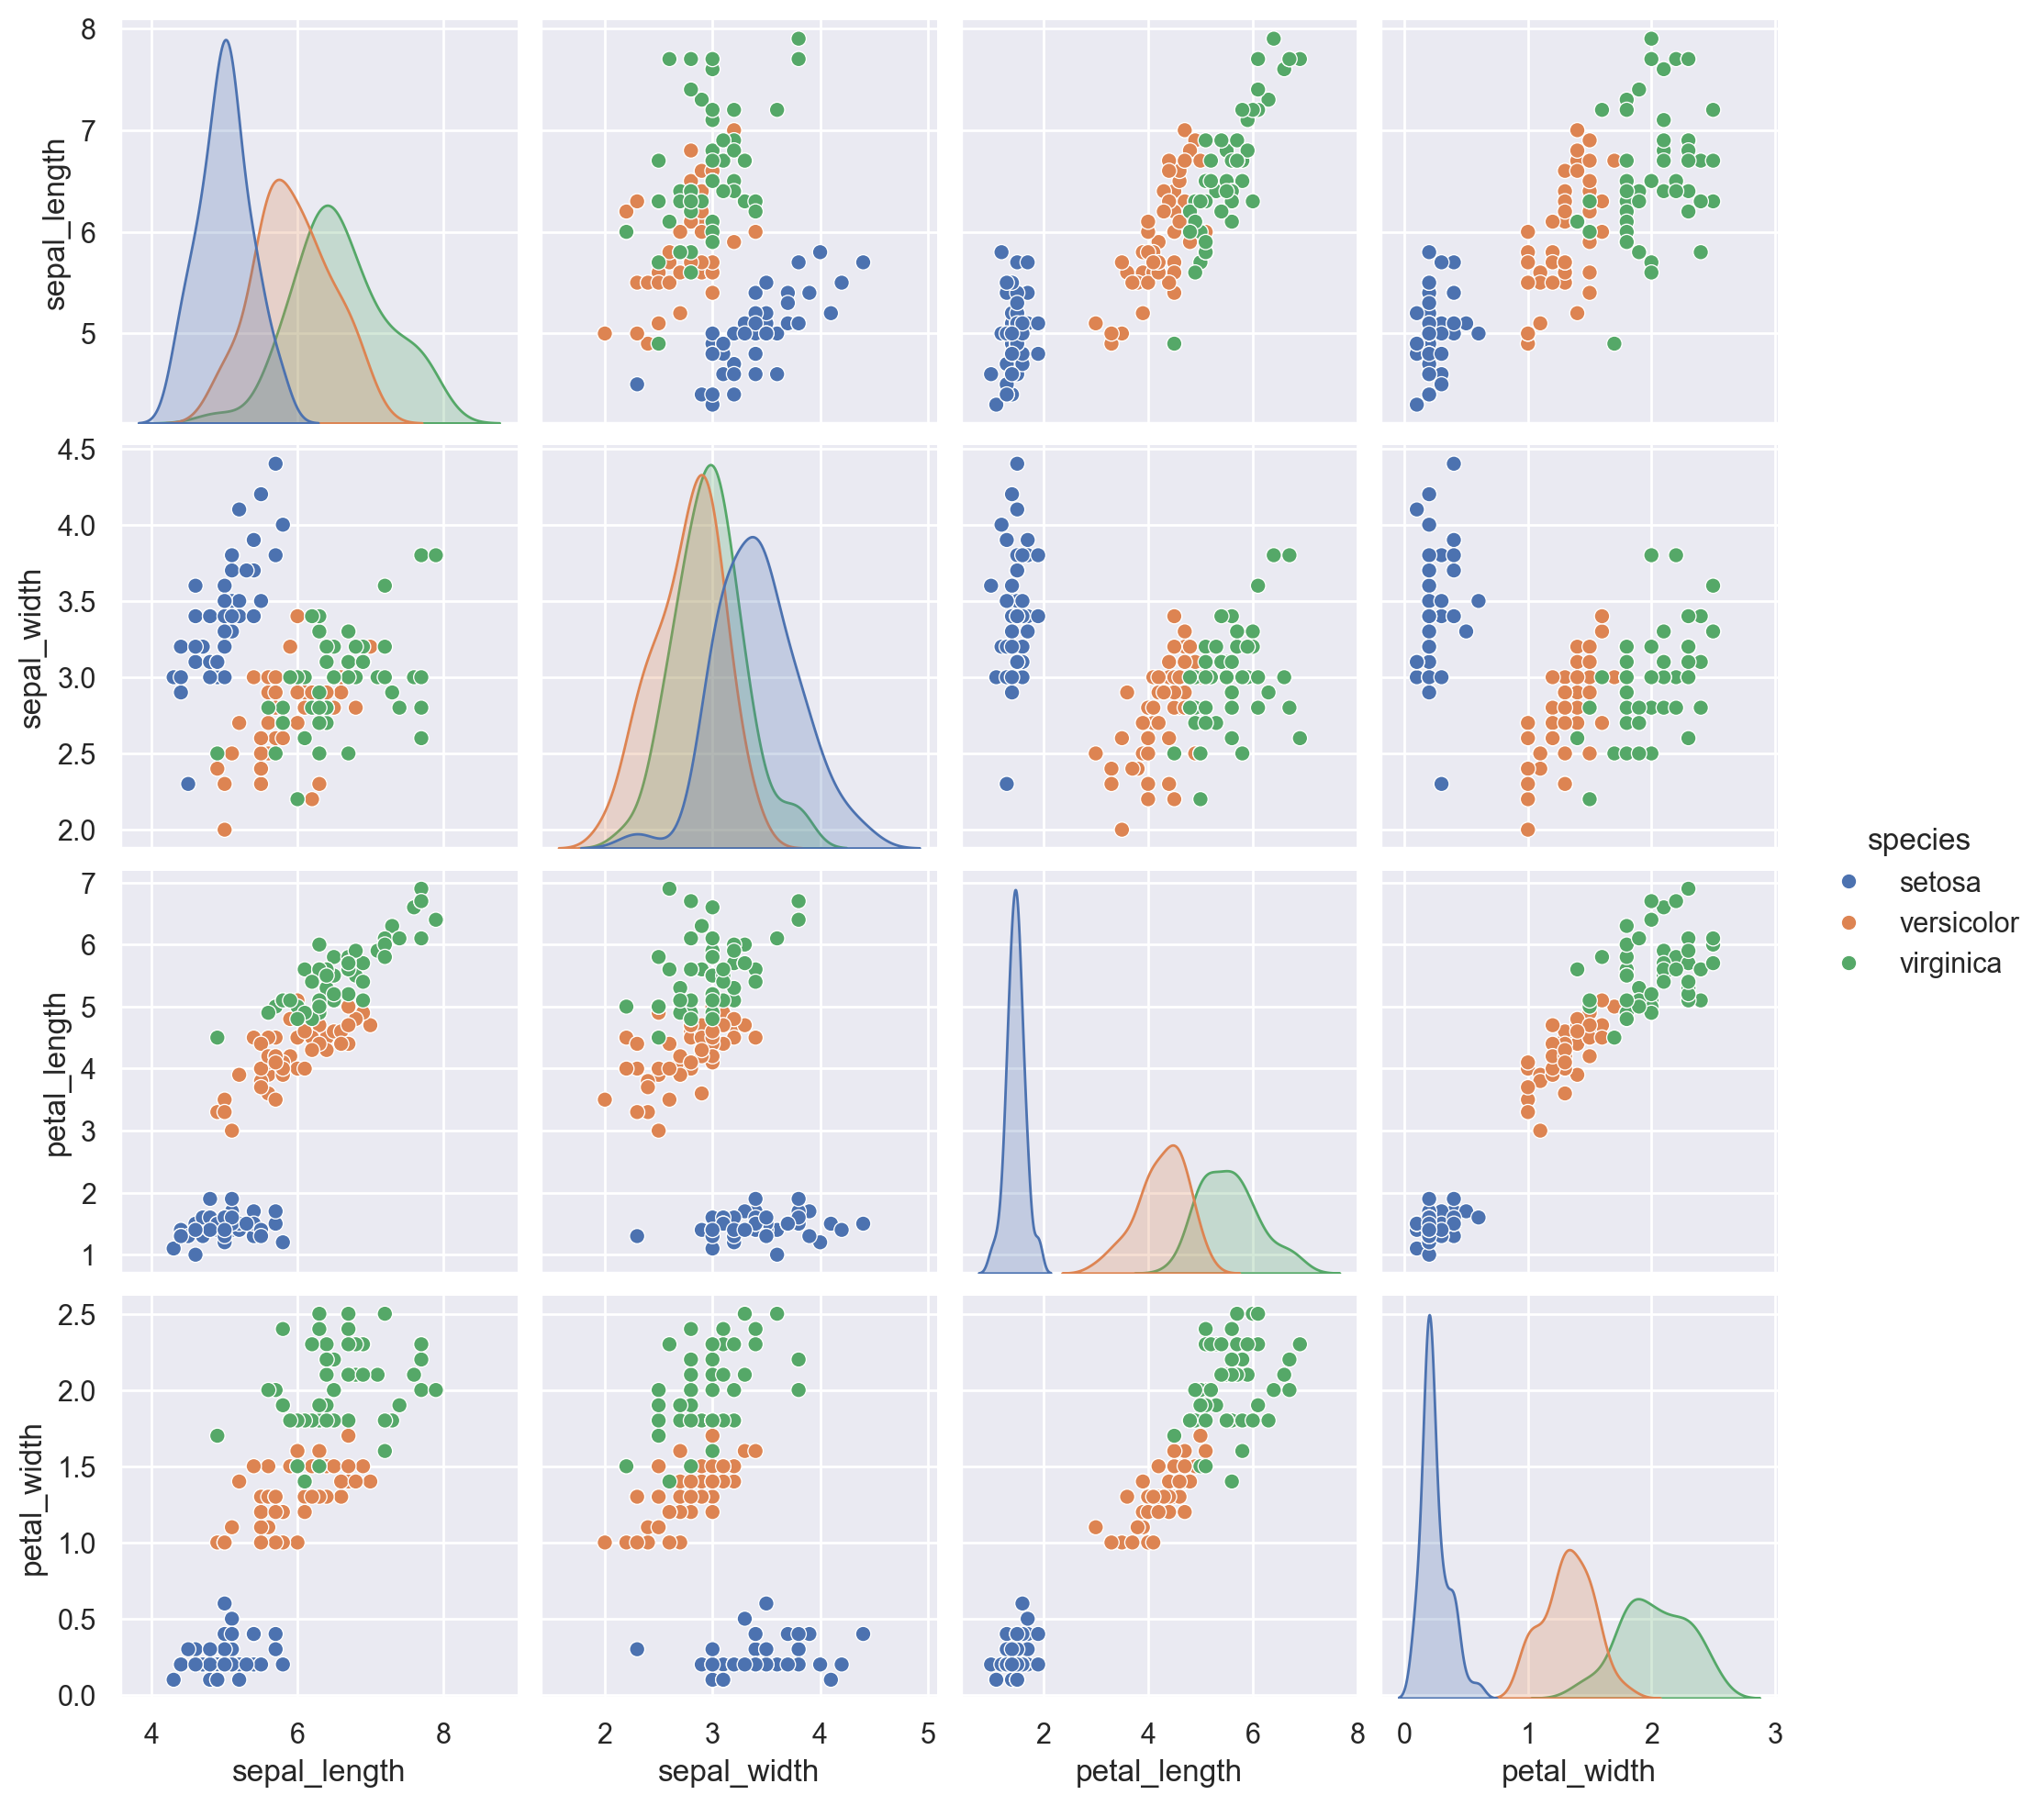

In [37]:
# pairwise relationship
sns.pairplot(iris,
             hue='species')

c:\Users\AbdessalemDjoudi\Desktop\MLOPS-DSTI\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\AbdessalemDjoudi\Desktop\MLOPS-DSTI\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\AbdessalemDjoudi\Desktop\MLOPS-DSTI\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(x=vector, **plot_kwargs)
c:\Users\AbdessalemDjoudi\Desktop\MLOPS-DSTI\.venv\Lib\site-packages\seaborn\axisgrid.py:1513: FutureWarning: 

`shade` is now deprecated in favor of `

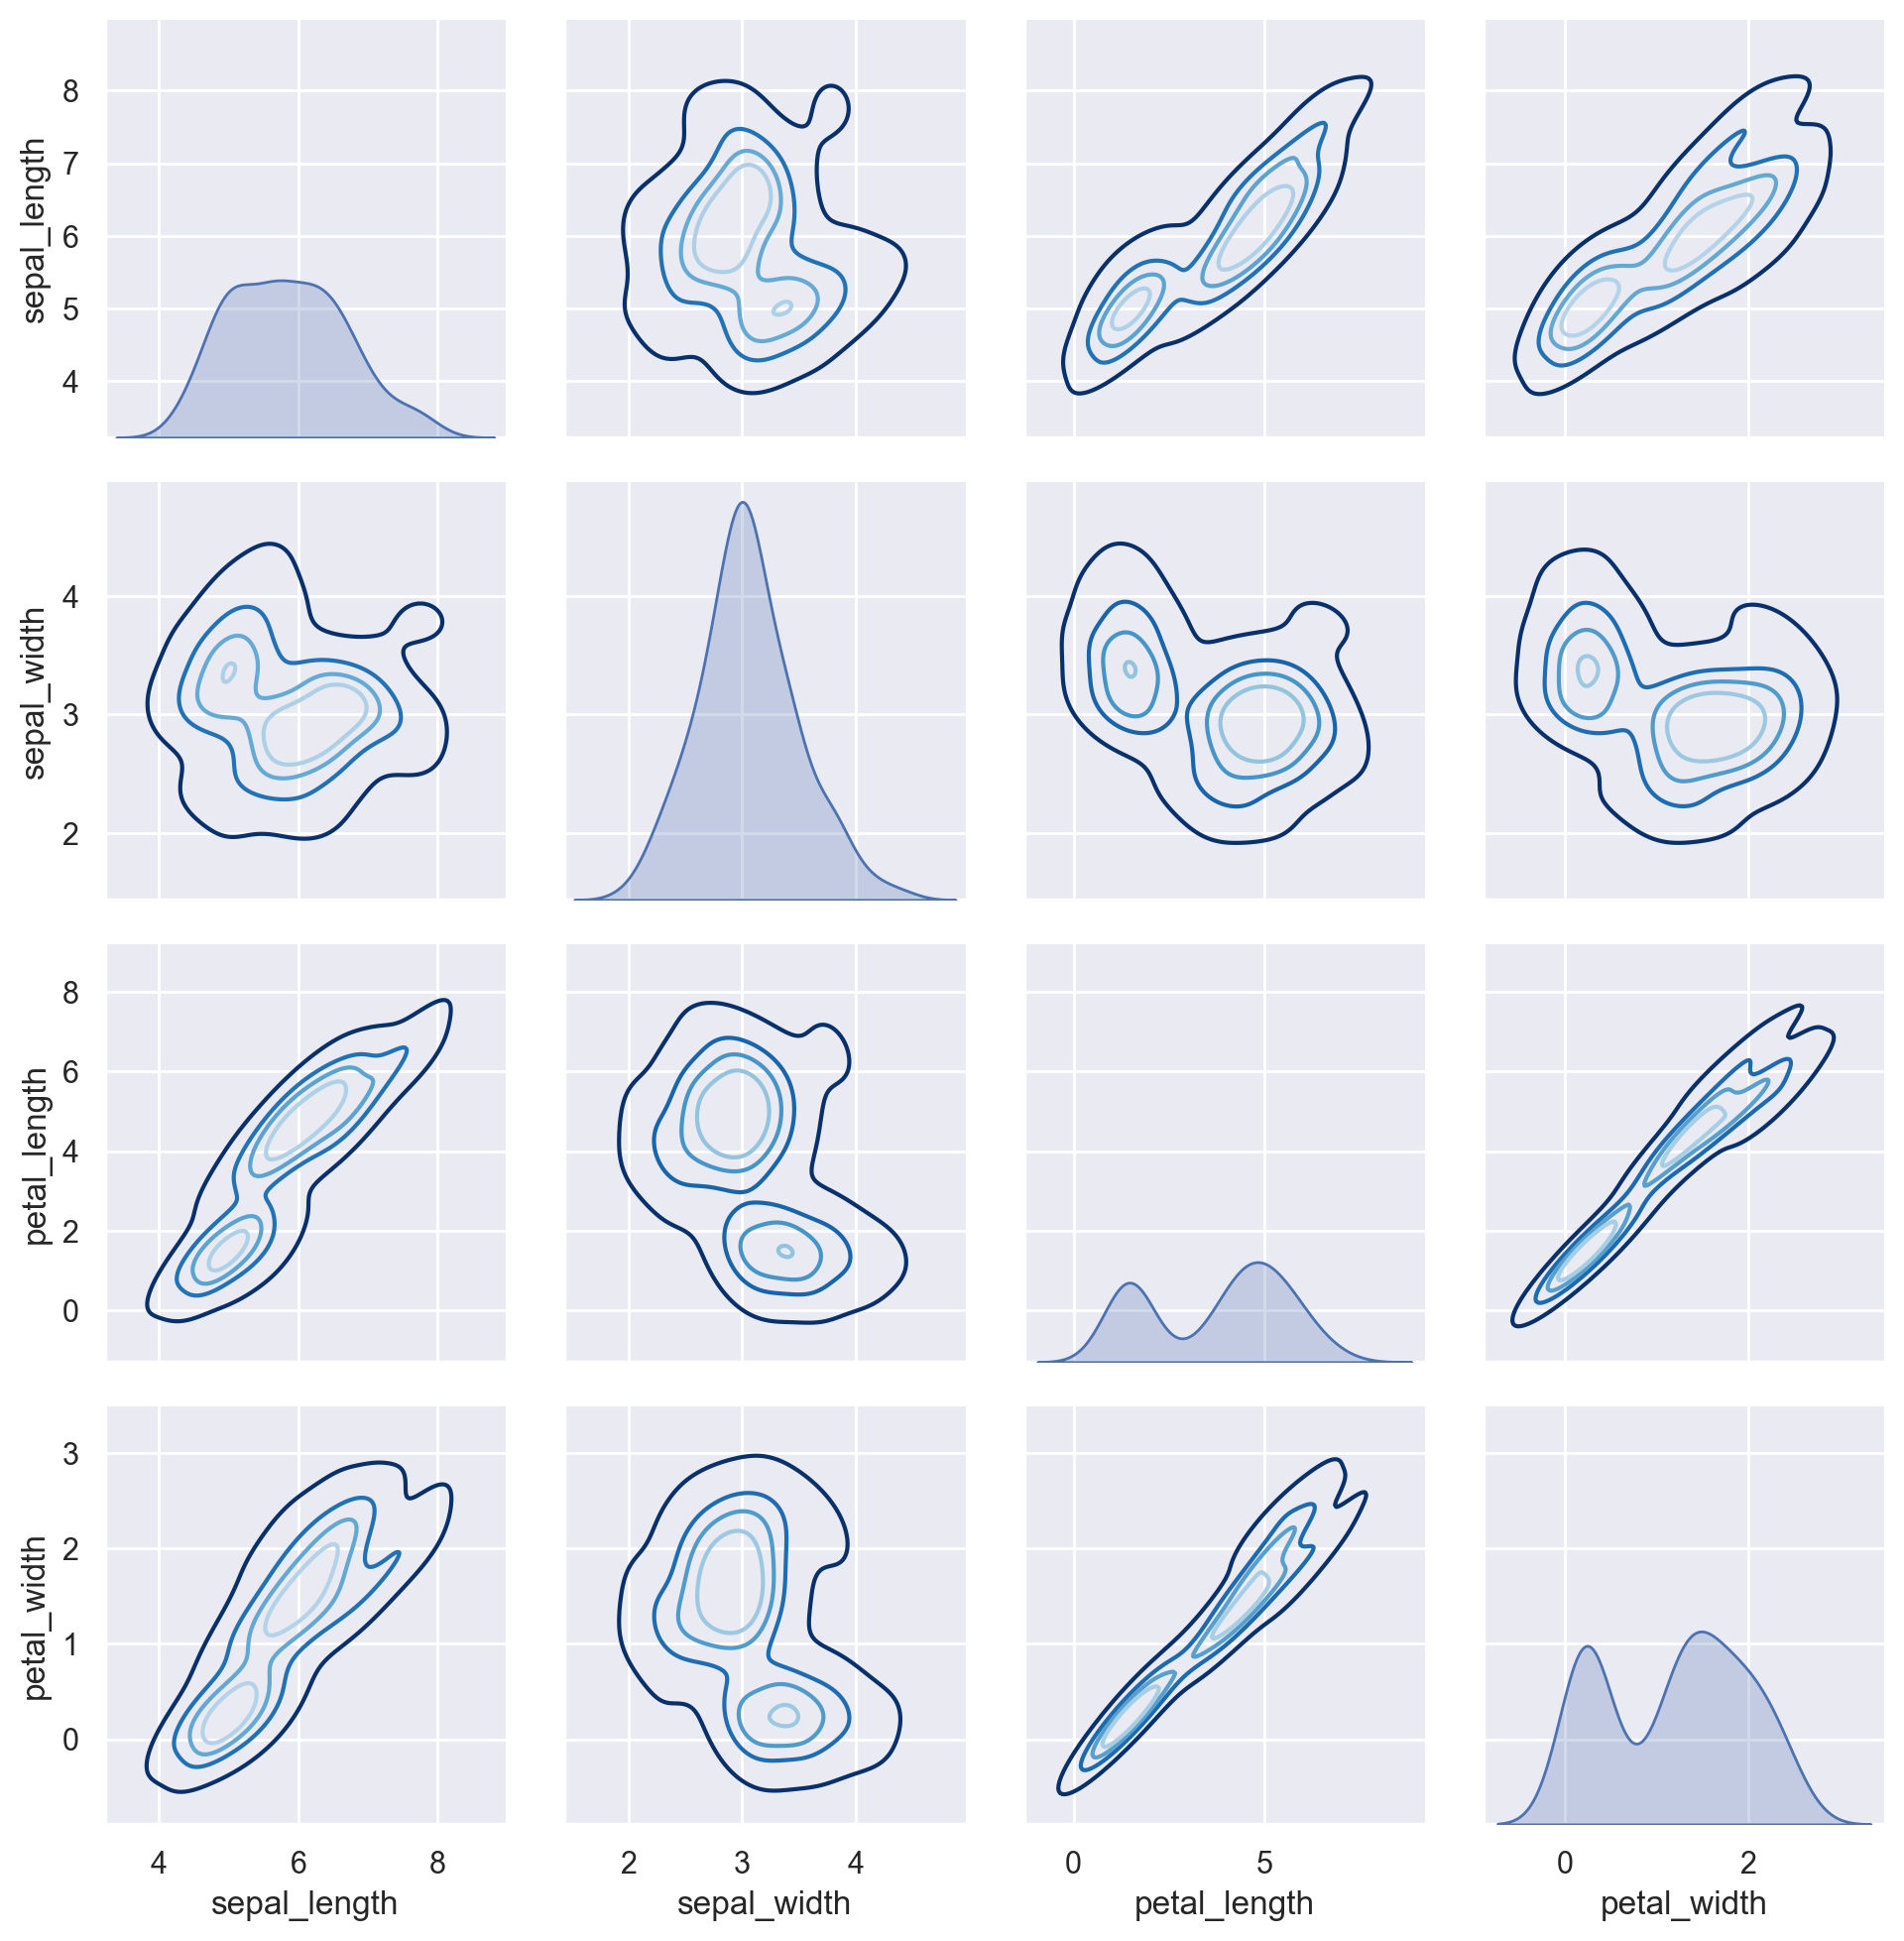

In [38]:
g = sns.PairGrid(iris)
g.map_diag(sns.kdeplot, shade=True)
g.map_offdiag(sns.kdeplot, cmap="Blues_r", n_levels=5)

### Categorical Data

In [39]:
iris['above_sepal_width_mean'] = iris['sepal_width'] > iris['sepal_width'].mean()

#### Scatterplot

<Axes: xlabel='species', ylabel='sepal_width'>

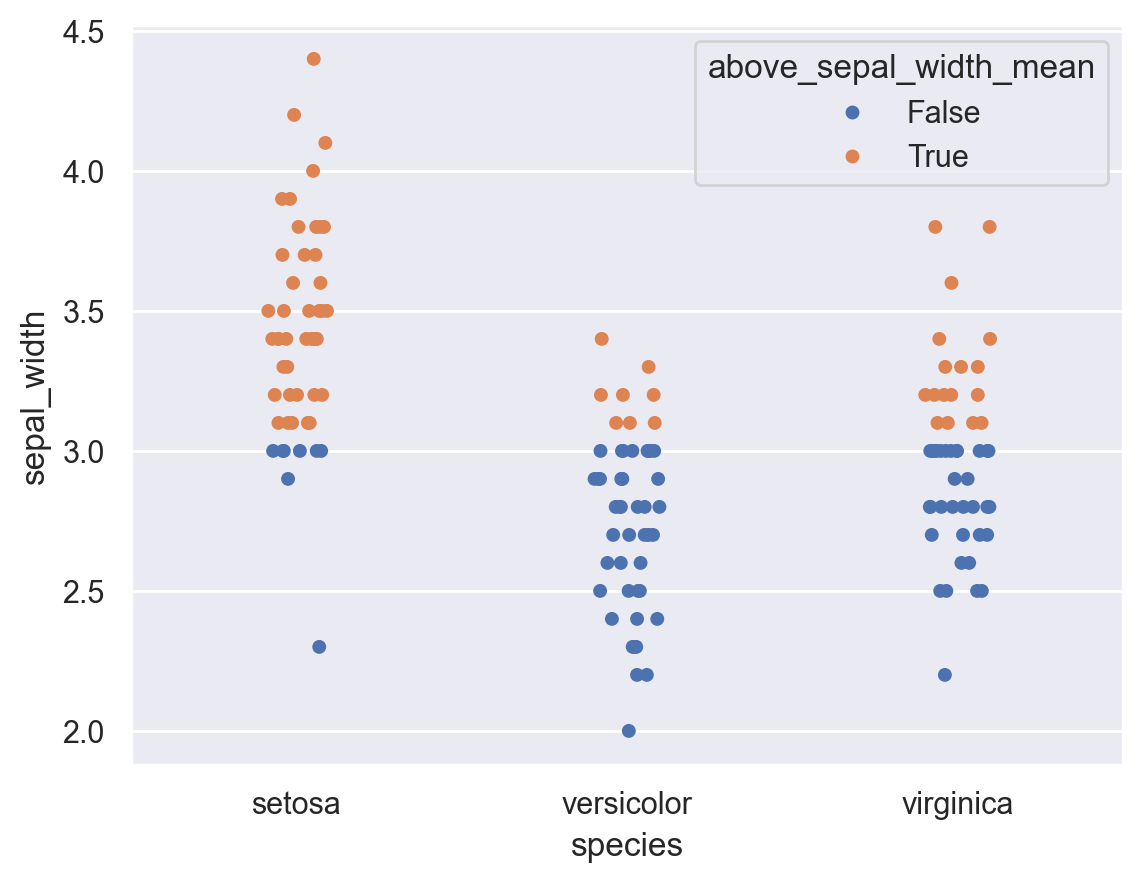

In [40]:
sns.stripplot(data=iris,
              x='species',
              y='sepal_width',
              hue='above_sepal_width_mean',
              jitter=True)

#### Distributions

<Axes: xlabel='species', ylabel='sepal_width'>

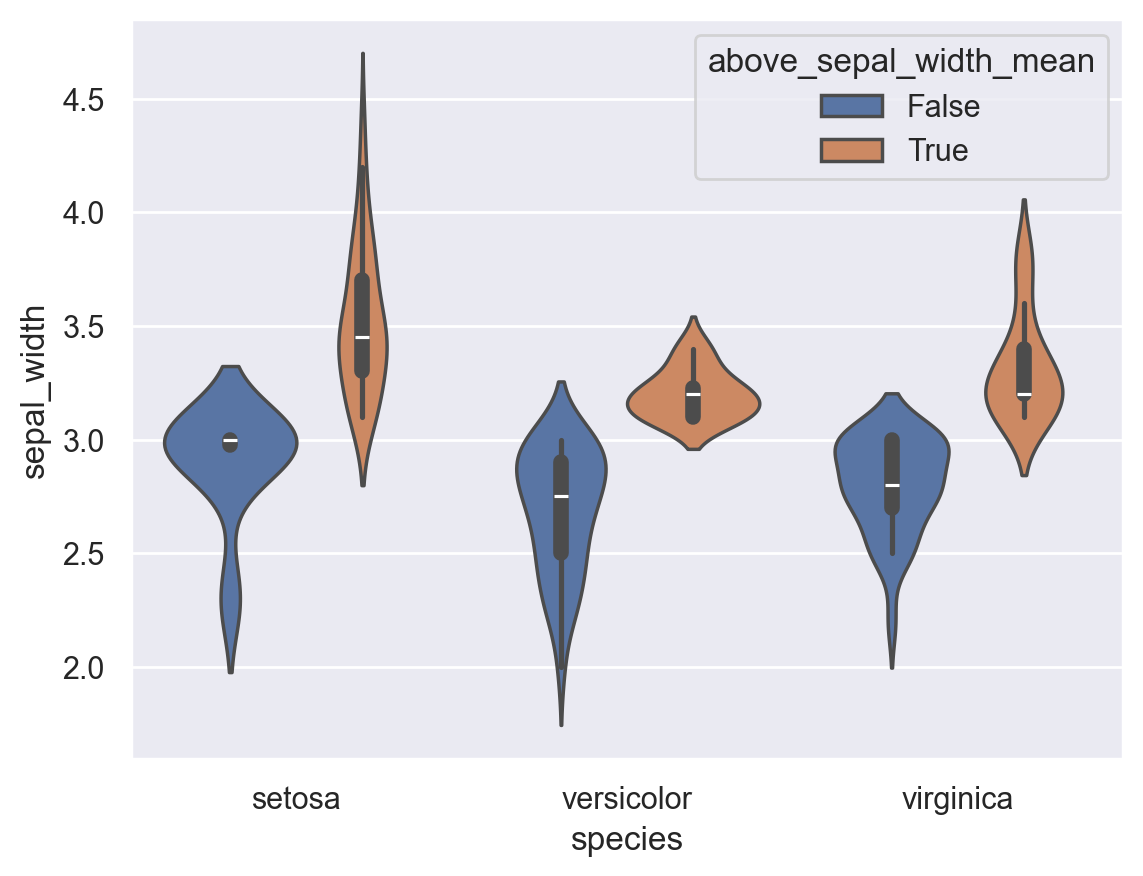

In [41]:
sns.violinplot(data=iris,
               x='species',
               y='sepal_width',
               hue='above_sepal_width_mean',
               inner='box')

---

## Build and plot Support Vector Machine classifers

Adapted from [sklearn docs](http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html)

In [42]:
# convert to sklearn format, grab first 2 columns
X = np.array(iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])[:, :2]

# convert strings to categorical
le = sklearn.preprocessing.LabelEncoder()
le.fit(iris['species'])
y = le.transform(iris['species'])

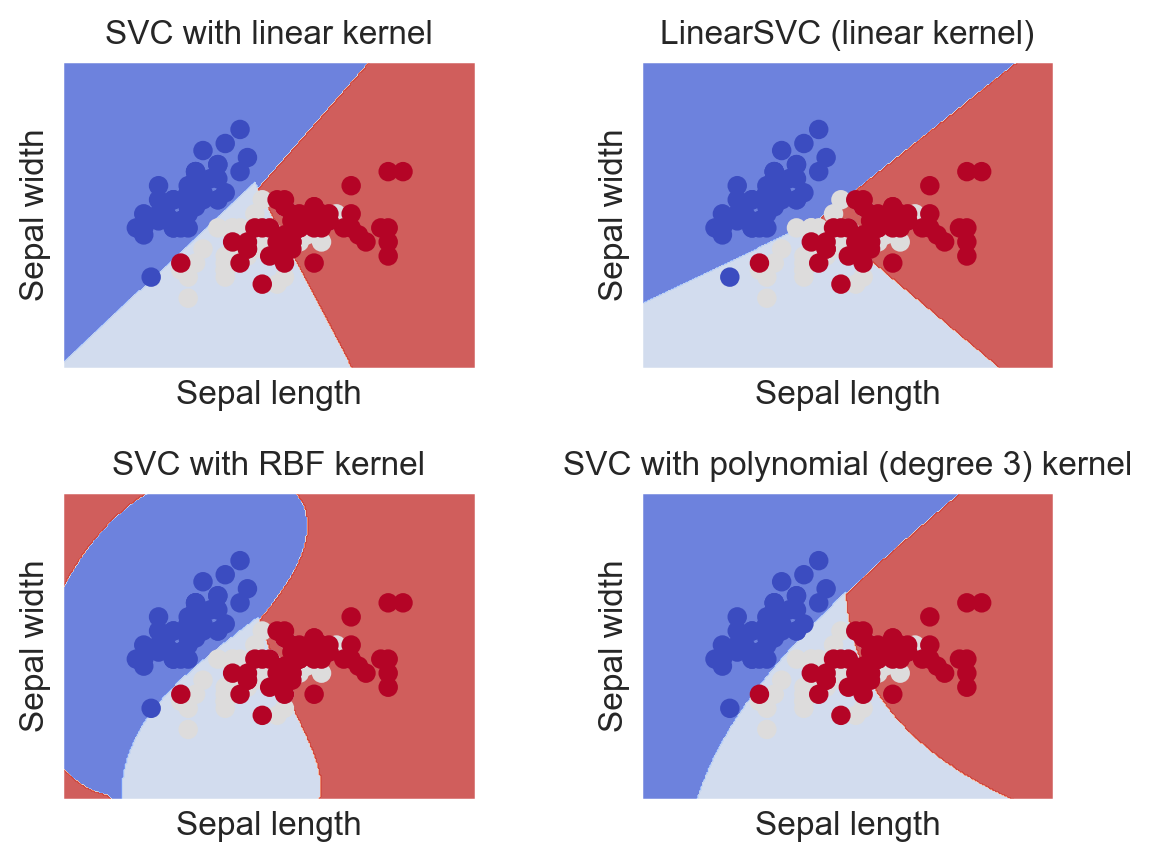

In [43]:
h = .02  # step size in the mesh

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc = sklearn.svm.SVC(kernel='linear', C=C).fit(X, y)
rbf_svc = sklearn.svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(X, y)
poly_svc = sklearn.svm.SVC(kernel='poly', degree=3, C=C).fit(X, y)
lin_svc = sklearn.svm.LinearSVC(C=C).fit(X, y)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()